<a href="https://colab.research.google.com/github/Livy-Li/Time_Series_Prediction/blob/main/Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Summary

Demand forecasting is a crucial component in supply chain processes. It’s the essential factor that drives most of the supply chain decisions. It improves efficiencies, reduces waste, and optimizes inventories. Customer satisfaction is a very important metrics in retail industries, having enough to meet demands can improve customer satisfaction, thus increasing market shares. With the right demand forecasting methods, business performance (KPIs) can be improved. 

Demand forecasting is generalized as the use of existing data to predict the quantity of products in the future. Generally, more data leads to improved accuracy and better pattern recognitions. There are many demand-forecasting models in the industry. For example: traditional statistical methods such as time-series analysis as well as machine learning algorithms such as linear regression.

In this project, one method from each type is used to forecast the order quantities. Moving Average method (MA) and Linear Regression (LR) method are applied in this case. The purpose of this project is to predict order quantities for different materials based on historical clients’ orders histories. Date, client number, material number, and order quantity are given in a csv data file.

The data will be imported into an ipynb notebook. Exploratory data analysis will be performed to visualize the order quantity trends and distribution. Then two methods will be coded so the below function can be achieved:

The user can enter any given date, client number and material number, the models will return a suggested order quantity or also known as the forecast value.  If the user only enters the date and material, the prediction will be based on the aggregated sum forecast of this material from all clients. If the user only enters date and client, the prediction will be based on the aggregated sum forecast of all materials from this client. If the user enters all parameters: date, client, and material, then forecast will then be based on all available data. 


### Setting up data

#### Importing packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date, datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Importing raw data

In [ ]:
Raw_DF = pd.read_csv('Order History.csv')

In [ ]:
Raw_DF.shape

(2773, 4)

# B. Exploratory data analysis

There are a few steps we need to do for the exploratory data analysis. 

- A introduction to the dataset is needed. This includes explaining the columns.

- We will need to identify if the date ranges are continuous or discrete. 
If it's discrete, we would need to add the remaining dates and fill the quantities with 0.

- We will need to identify the number of clients.

- We will need to identify the number of materials.

Then moving onto visualizations:

- We will need to plot the histogram of the the order quantities (bins) and frequency.

- We will need to plot the histogram of the materials and their order frequencies.

- We will need to plot the histogram of the clients and their order frequencies.

- We will need to plot the total ordered quantities of each material.

- We will need to plot the order trends for each client - material combinations.

## B.a. Explanation of Fields

The first 20 rows of the imported raw data are shown below. The dataset columns include the following information: 
- 'Date': order date
- 'Client': client who made the order
- 'Order Quantity': order quantity of material
- 'Material': material code

In [ ]:
Raw_DF.head(20)

Date Client  Order Quantity  Material
0    1/27/2020     c9           11712  12293768
1    1/15/2020     c9            6895  12246740
2    1/29/2020     c4             504  12321896
3   12/18/2019     c3             189  12042081
4   12/18/2019     c3             110  11000851
5   12/18/2019     c3             396  11000858
6   12/18/2019     c3             315  11001186
7    1/27/2020     c9            4160  12293768
8   12/30/2019     c2             104  12246740
9    2/21/2020     c8            1386  11000858
10   2/20/2020    c10             297  11000858
11   2/20/2020    c10             210  11001186
12    1/3/2020     c8             420  12322779
13    1/3/2020     c8             240  12293768
14   1/27/2020     c9            3392  12293768
15  12/27/2019     c3              48  12222902
16   1/22/2020     c3             104  12246740
17    1/6/2020     c2              96  12222902
18   1/14/2020     c6             252  12395525
19   1/14/2020     c6             105  12322779

There are 10 unique clients and 20 different materials in the given dataset. 

In [ ]:
Raw_DF.Client.unique()

array(['c9', 'c4', 'c3', 'c2', 'c8', 'c10', 'c6', 'c5', 'c7', 'c1'],
      dtype=object)

In [ ]:
Raw_DF.Material.unique()

array([12293768, 12246740, 12321896, 12042081, 11000851, 11000858,
       11001186, 12322779, 12222902, 12395525, 12293783, 12404641,
       12271469, 12320618, 12320670, 12320619, 12396696, 12321895,
       12365978, 12160666])

Convert the 'Material' into strings and 'Date' into datetime format. Create 'client-material' combination to identify the materials each client  ordered in the past.

In [ ]:
Raw_DF['Material'] = Raw_DF['Material'].astype(str)
Raw_DF['Date'] = pd.to_datetime(Raw_DF['Date'])
Raw_DF_Data = Raw_DF.copy()

In [ ]:
Raw_DF['Client-Material'] = Raw_DF['Client'] + '-' +Raw_DF['Material']

In [ ]:
Raw_DF = Raw_DF.sort_values('Date', axis=0, ascending=True)

In [ ]:
Raw_DF.Date.unique()

array(['2019-12-05T00:00:00.000000000', '2019-12-06T00:00:00.000000000',
       '2019-12-09T00:00:00.000000000', '2019-12-10T00:00:00.000000000',
       '2019-12-12T00:00:00.000000000', '2019-12-13T00:00:00.000000000',
       '2019-12-16T00:00:00.000000000', '2019-12-17T00:00:00.000000000',
       '2019-12-18T00:00:00.000000000', '2019-12-19T00:00:00.000000000',
       '2019-12-20T00:00:00.000000000', '2019-12-21T00:00:00.000000000',
       '2019-12-22T00:00:00.000000000', '2019-12-23T00:00:00.000000000',
       '2019-12-24T00:00:00.000000000', '2019-12-25T00:00:00.000000000',
       '2019-12-26T00:00:00.000000000', '2019-12-27T00:00:00.000000000',
       '2019-12-28T00:00:00.000000000', '2019-12-29T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08

## B.b. Visualization

Based on the histogram, most of the order quantity are small, which are within the range from 0 to 1000.

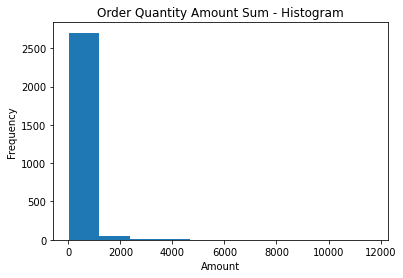

In [ ]:
plt.hist(Raw_DF['Order Quantity'])
plt.title('Order Quantity Amount Sum - Histogram')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Among the 2773 orders made, material 12222902 was ordered most frequently, material 12160666 was ordered least frequently. Yet quantity-wise, material 12271469 was ordered the most and material 12160666 was ordered the least.

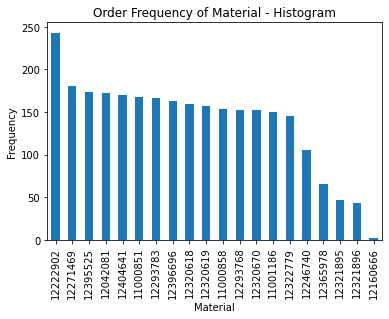

In [ ]:
Raw_DF['Material'].value_counts().plot.bar()
plt.title('Order Frequency of Material - Histogram')
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Quantity')

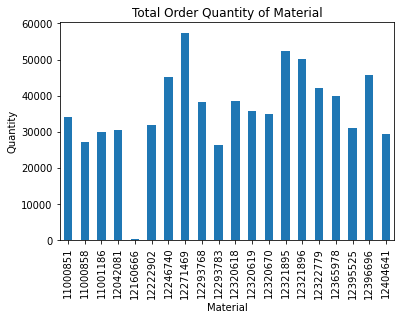

In [ ]:
Raw_DF.groupby('Material')['Order Quantity'].agg(lambda x: sum(x)).plot(
    kind='bar',title='Total Order Quantity of Material')
plt.ylabel('Quantity')

Client c1 ordered most frequently; client c9 ordered least frequently.

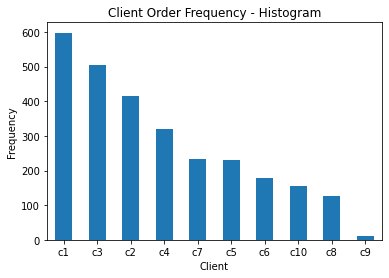

In [ ]:
Raw_DF['Client'].value_counts().plot.bar()
plt.title('Client Order Frequency - Histogram')
plt.xlabel('Client')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

The following scattered plots show the material order quantity and ordering date trend of each client. 

c7-11001186


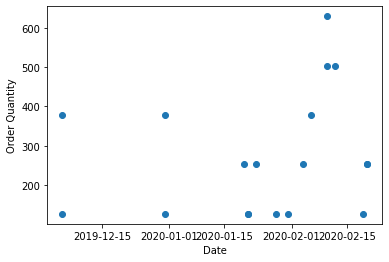

c7-12222902


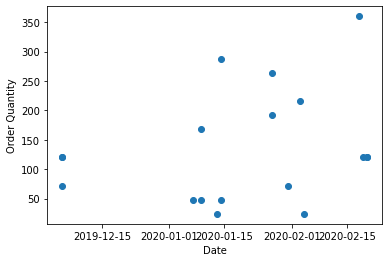

c7-11000858


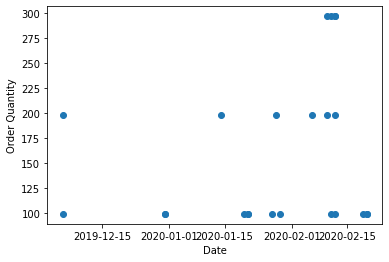

c7-11000851


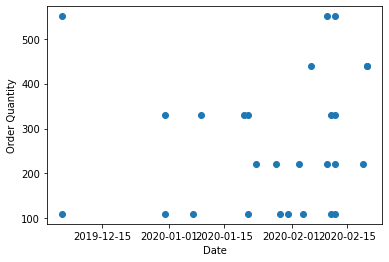

c7-12042081


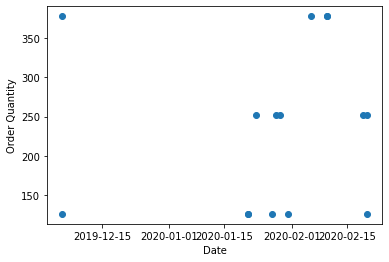

c7-12322779


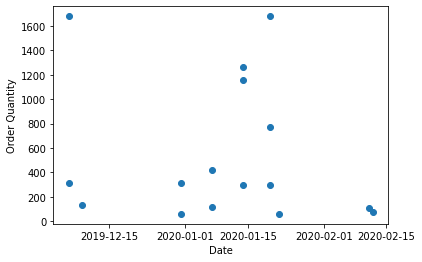

c7-12271469


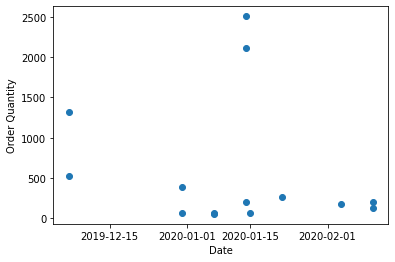

c7-12404641


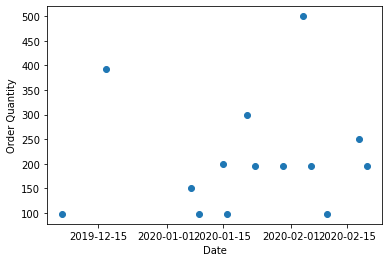

c7-12246740


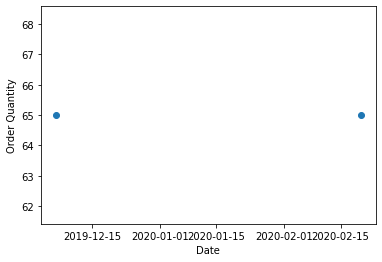

c6-12320618


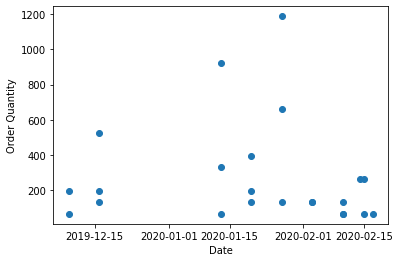

c6-12320619


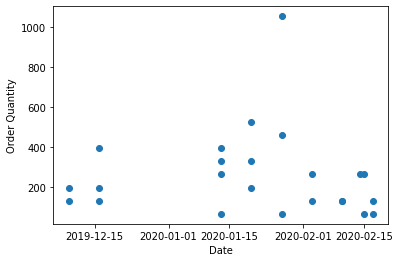

c6-12320670


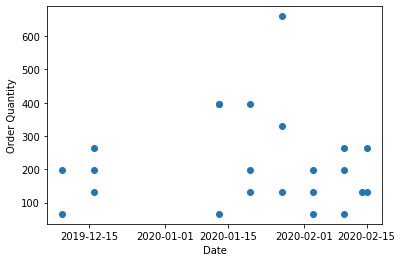

c4-12396696


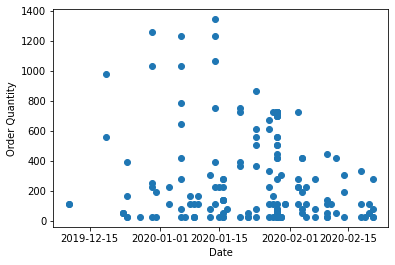

c6-12042081


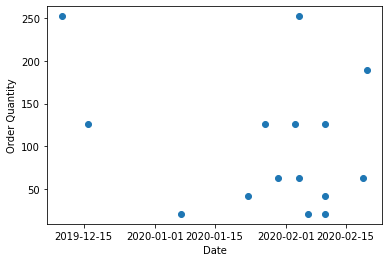

c6-11001186


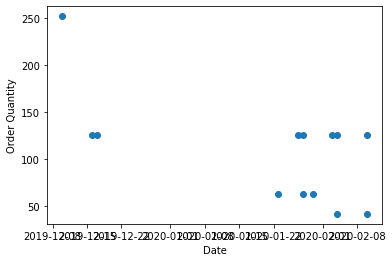

c6-11000851


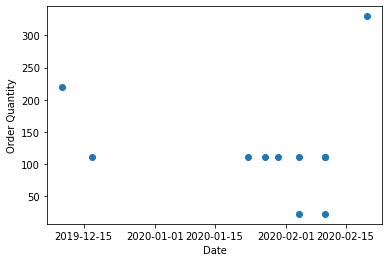

c6-11000858


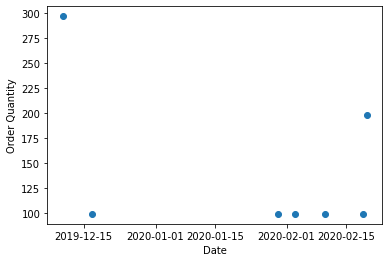

c3-11000851


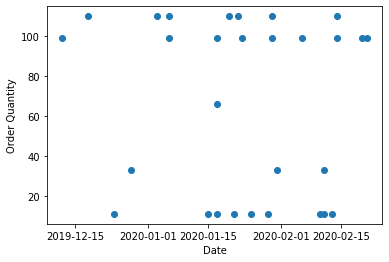

c3-11001186


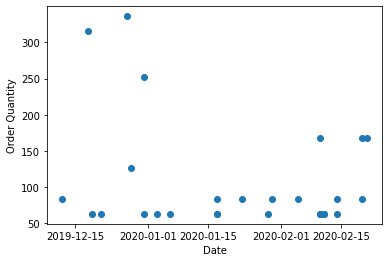

c3-12042081


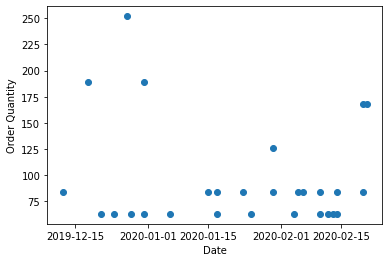

c5-12042081


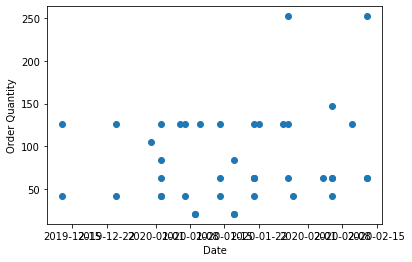

c5-11000851


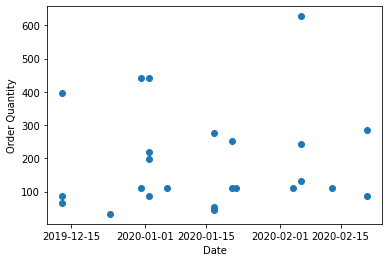

c5-11000858


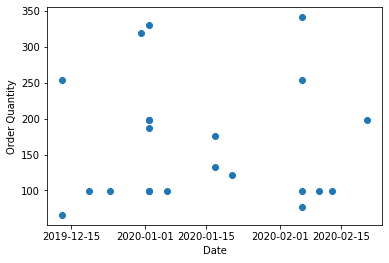

c8-12222902


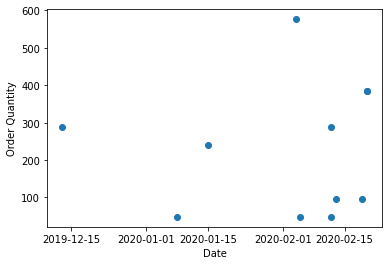

c6-12222902


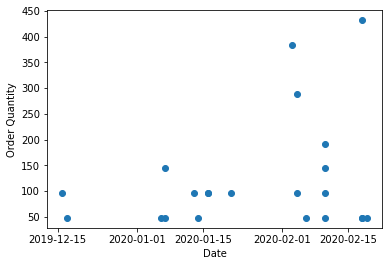

c3-12222902


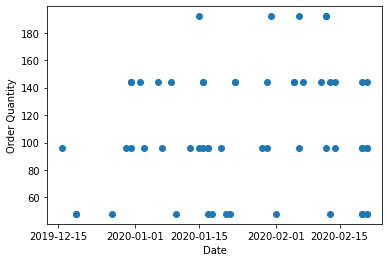

c4-12321895


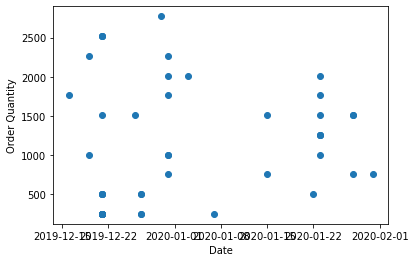

c5-12222902


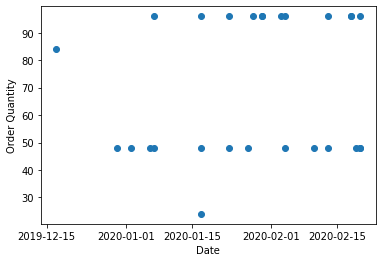

c10-12222902


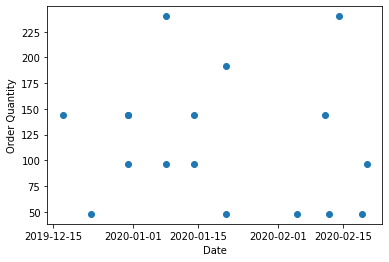

c10-11000858


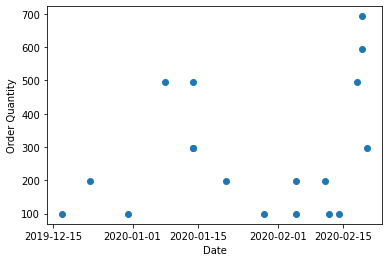

c3-12395525


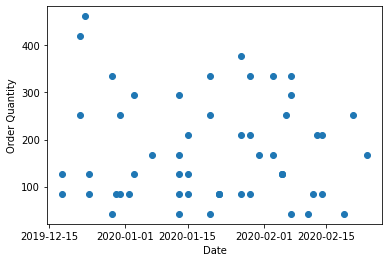

c3-12293768


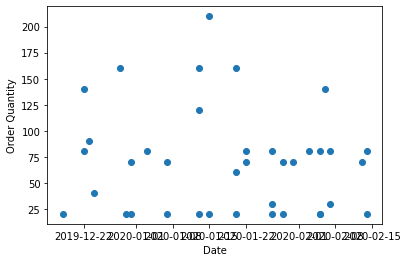

c3-11000858


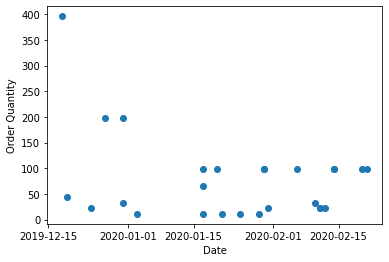

c10-12271469


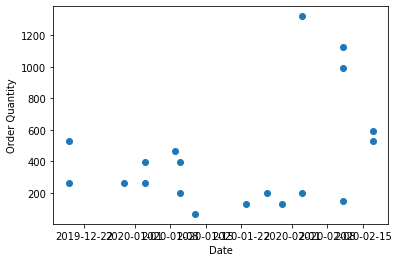

c10-12395525


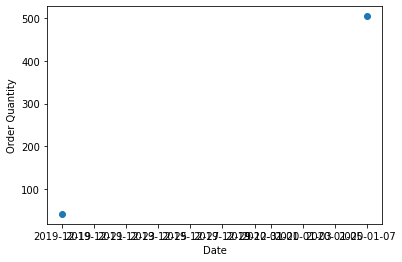

c10-12293768


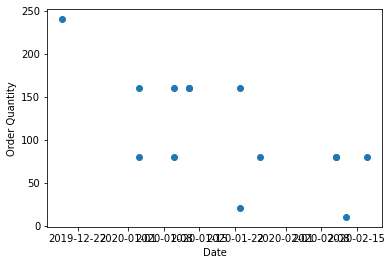

c5-12322779


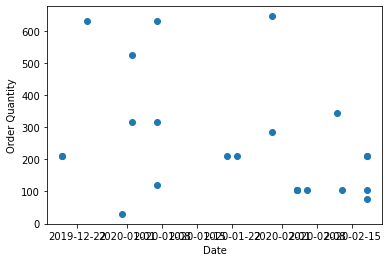

c5-12271469


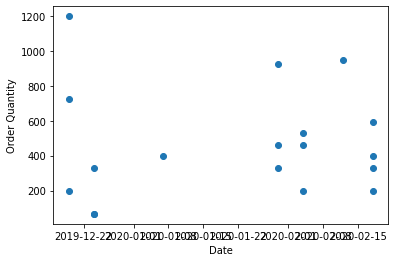

c5-12404641


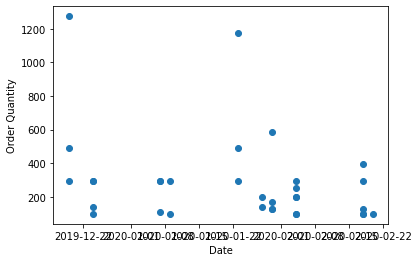

c3-12246740


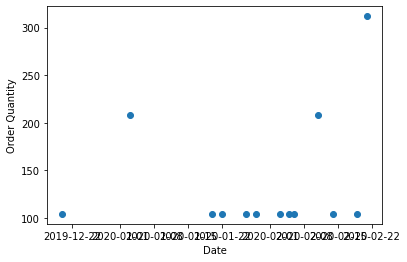

c4-12321896


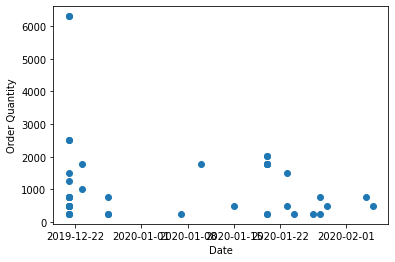

c3-12320619


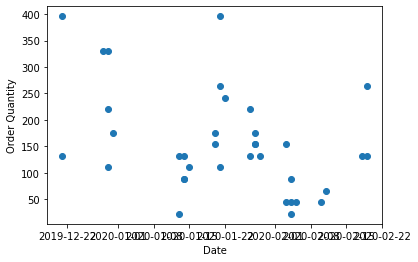

c3-12320670


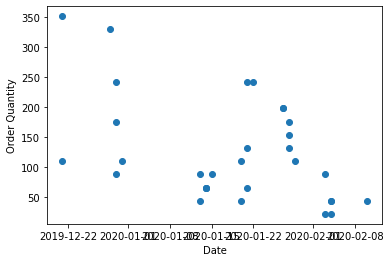

c3-12320618


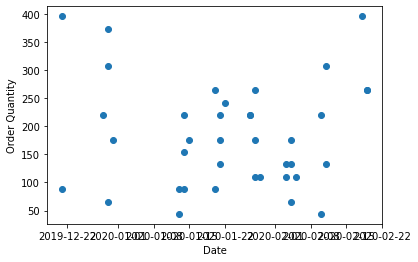

c3-12322779


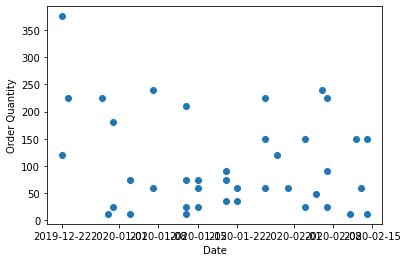

c3-12271469


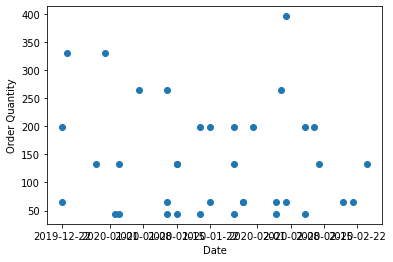

c3-12293783


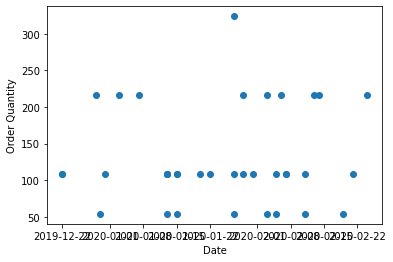

c1-12246740


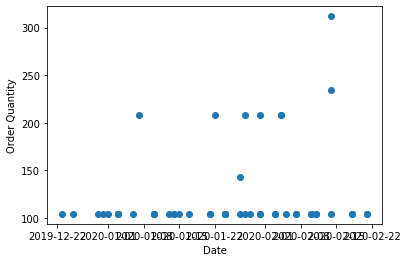

c8-12320618


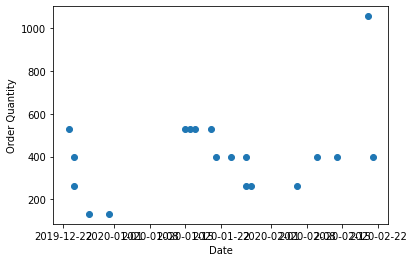

c8-12320619


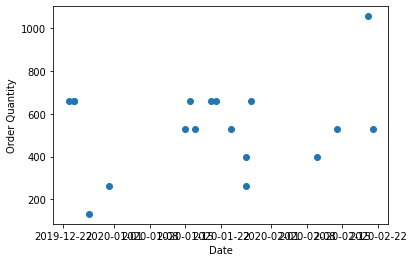

c8-12320670


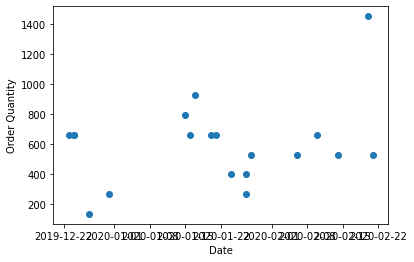

c2-11000851


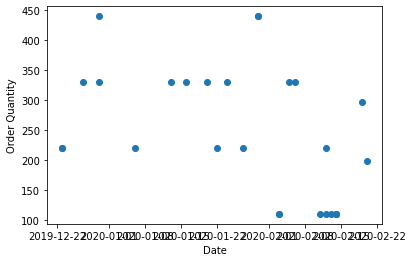

c2-11000858


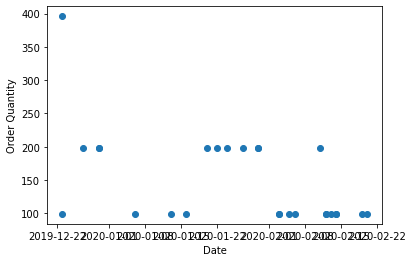

c2-12042081


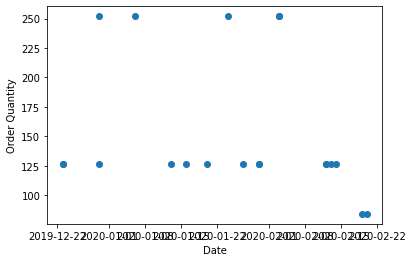

c2-11001186


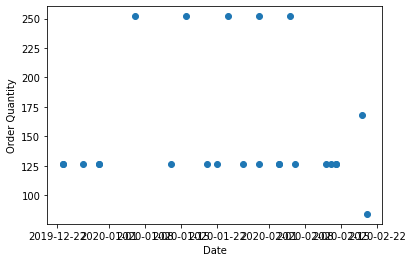

c1-12293783


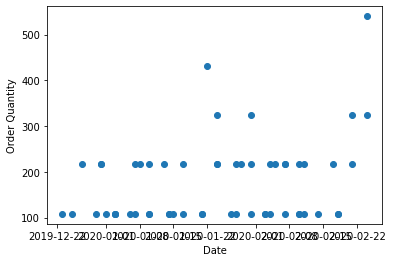

c1-12271469


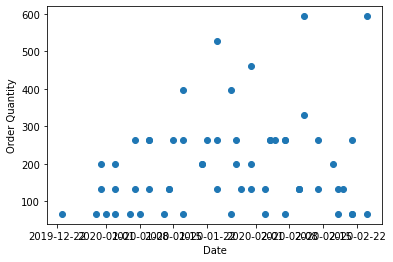

c1-12395525


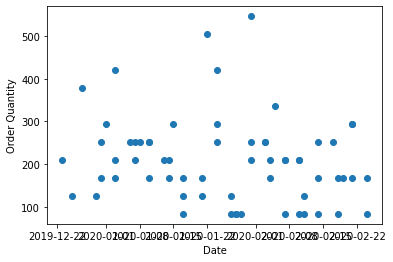

c7-12293783


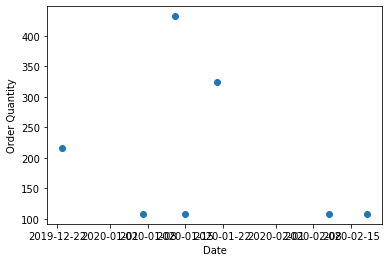

c1-12404641


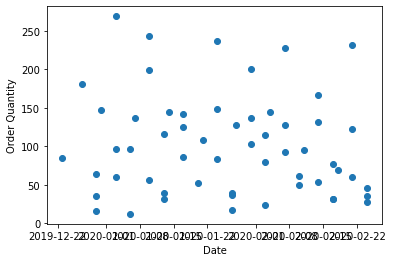

c6-12293768


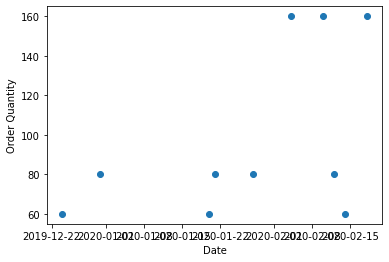

c7-12320618


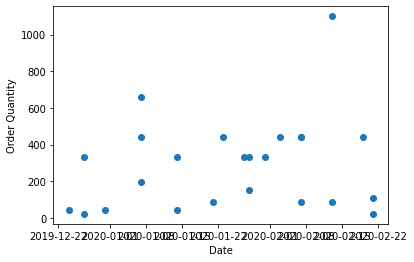

c7-12320619


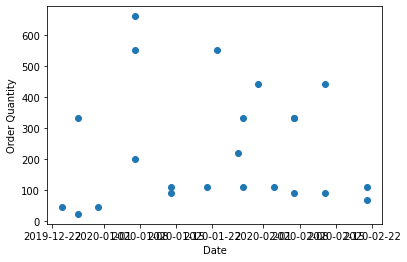

c7-12320670


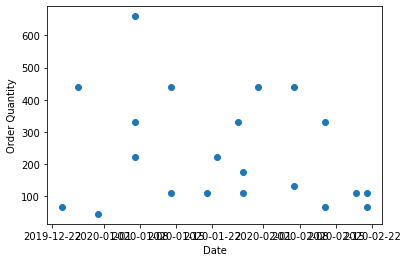

c6-12395525


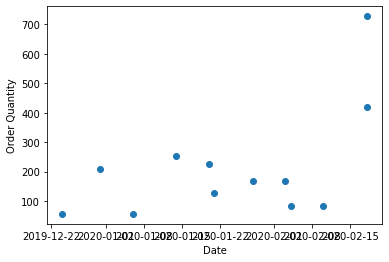

c2-12222902


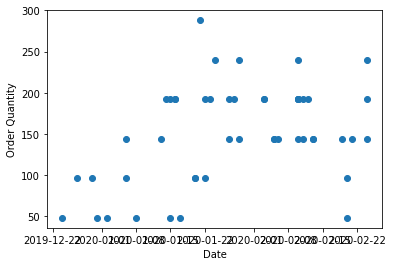

c1-12222902


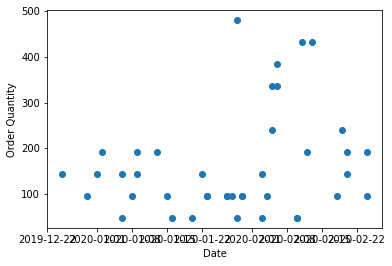

c1-12042081


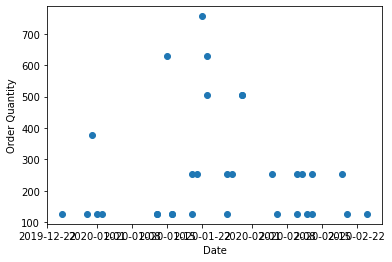

c1-11001186


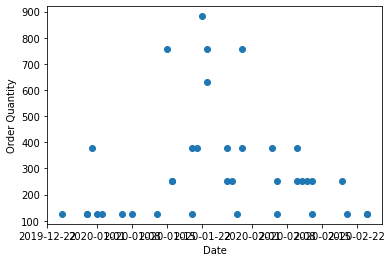

c1-12293768


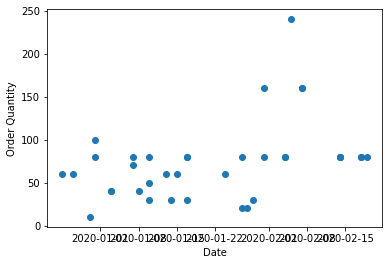

c4-12365978


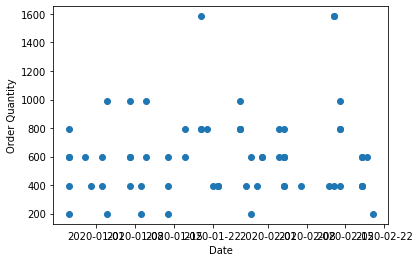

c2-12271469


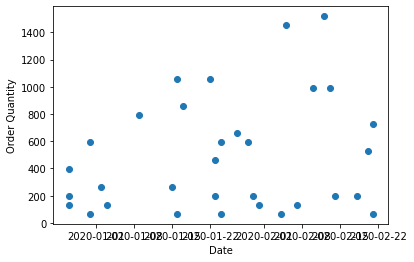

c2-12395525


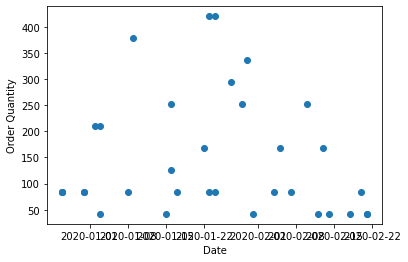

c2-12322779


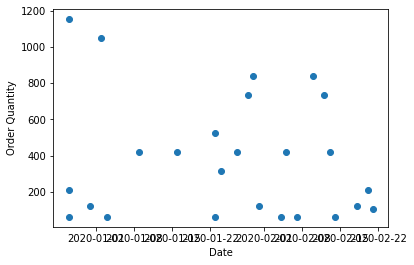

c2-12293768


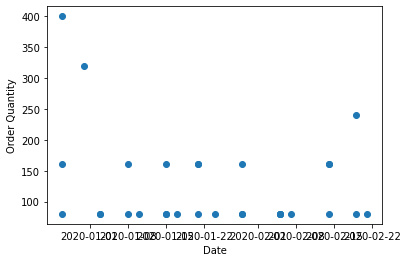

c2-12293783


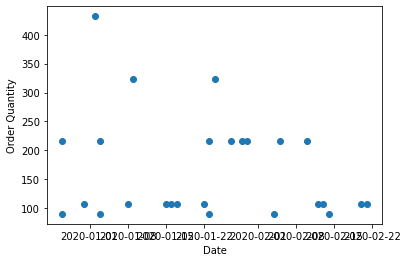

c8-12293768


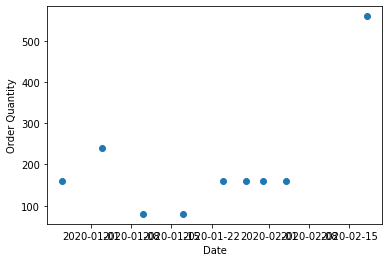

c8-12404641


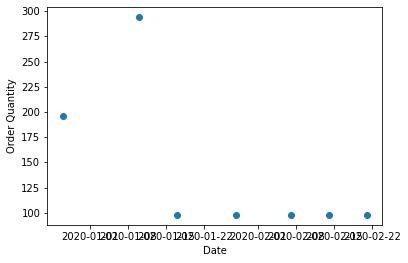

c8-12395525


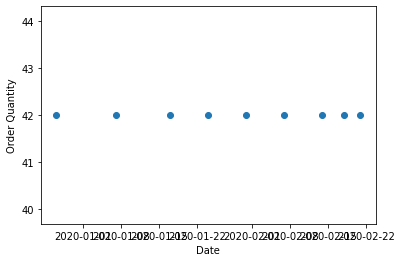

c8-12042081


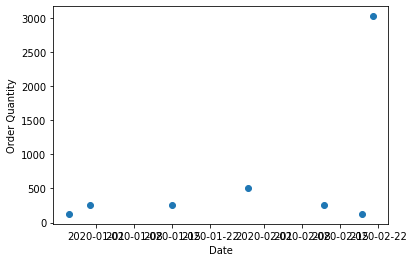

c8-11001186


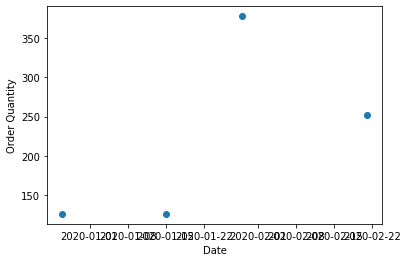

c6-12293783


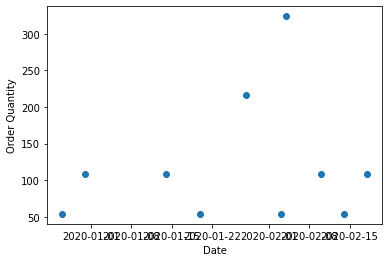

c10-12322779


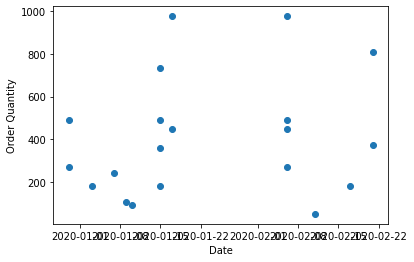

c1-12320670


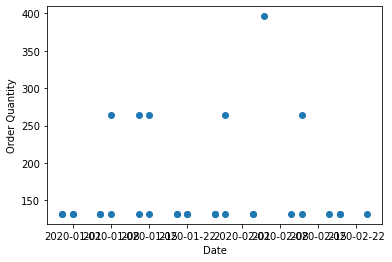

c1-12320618


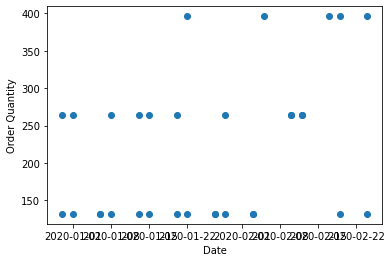

c1-12320619


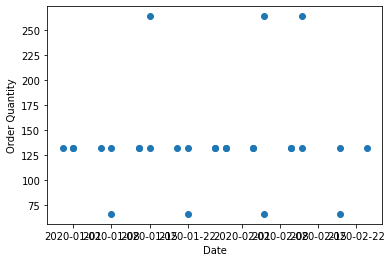

c2-12320619


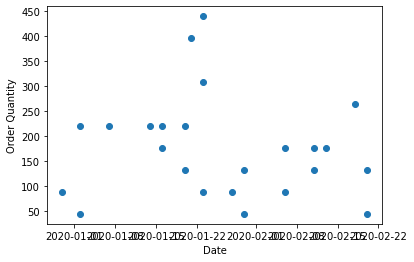

c2-12320618


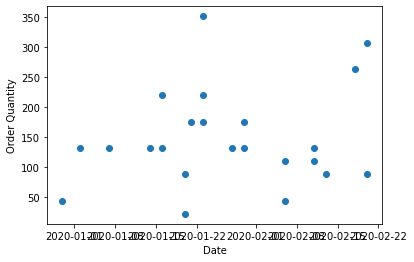

c3-12404641


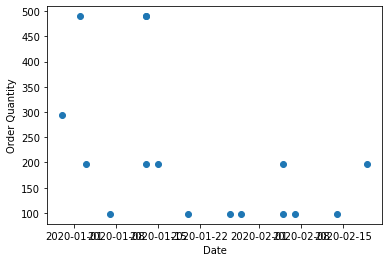

c2-12320670


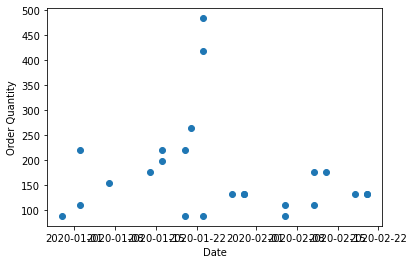

c2-12246740


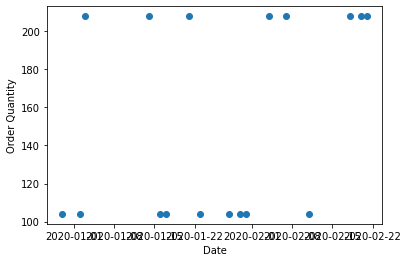

c10-12042081


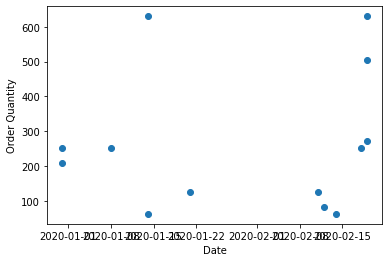

c2-12404641


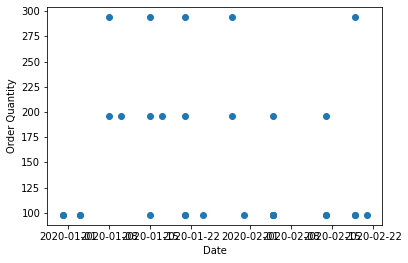

c10-11001186


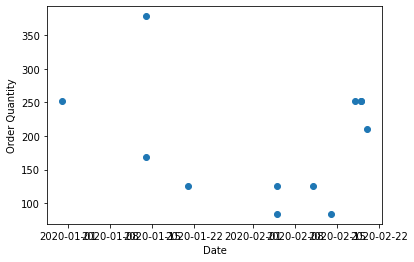

c1-11000858


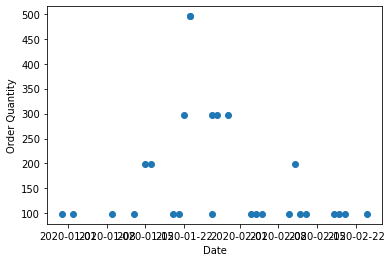

c1-11000851


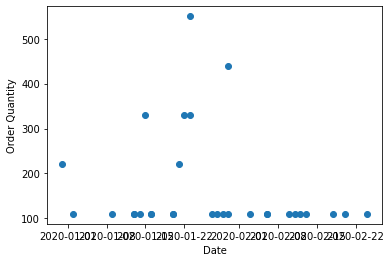

c1-12322779


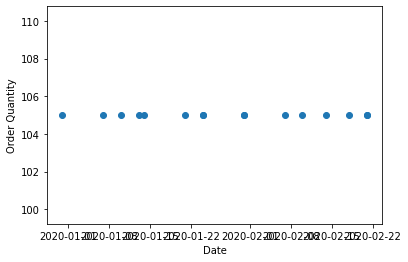

c5-11001186


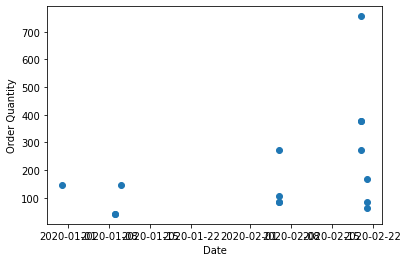

c8-11000858


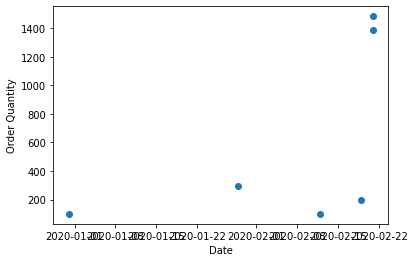

c8-11000851


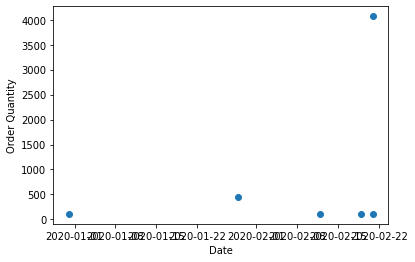

c6-12404641


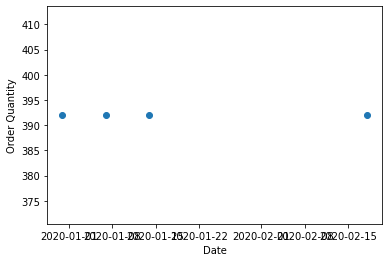

c5-12293783


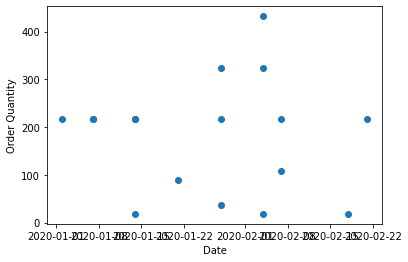

c10-12293783


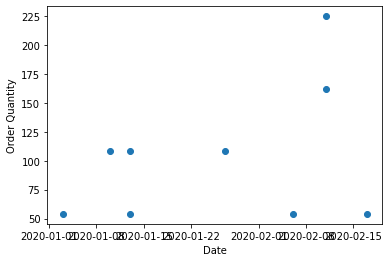

c8-12322779


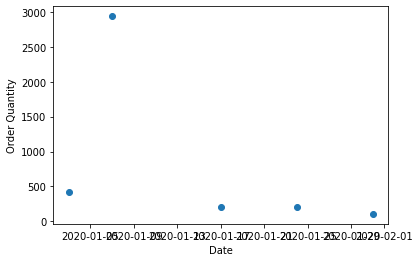

c10-11000851


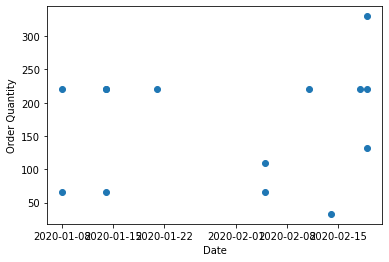

c10-12320670


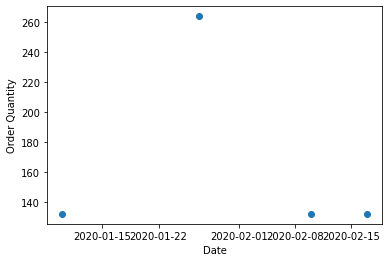

c10-12404641


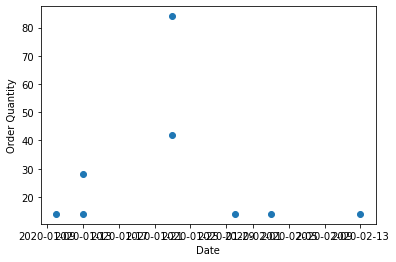

c10-12320619


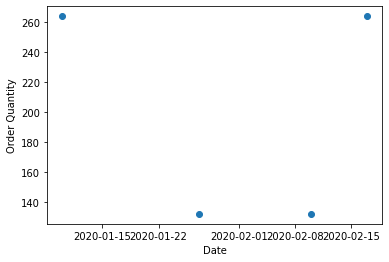

c5-12246740


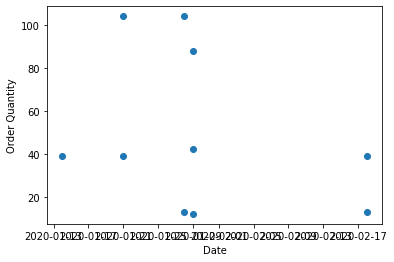

c6-12322779


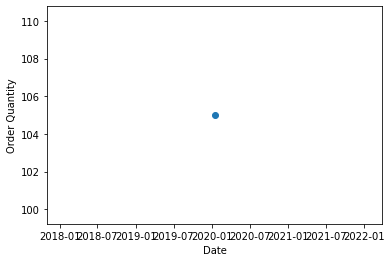

c9-12246740


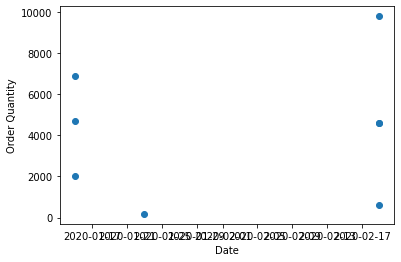

c8-12293783


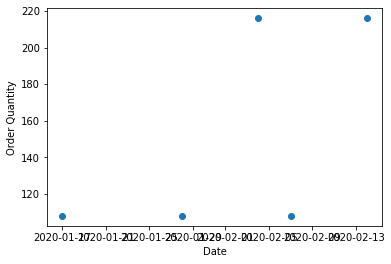

c7-12160666


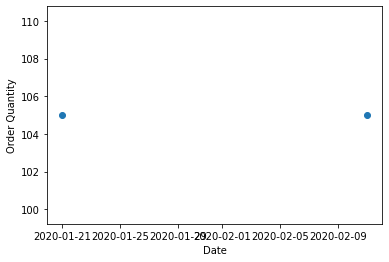

c7-12293768


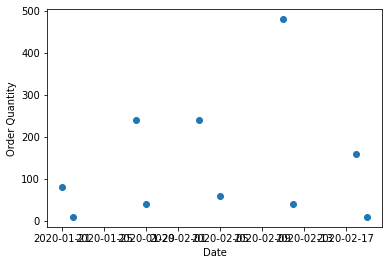

c6-12246740


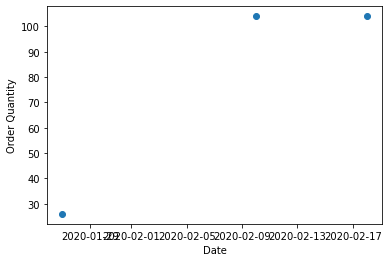

c9-12293768


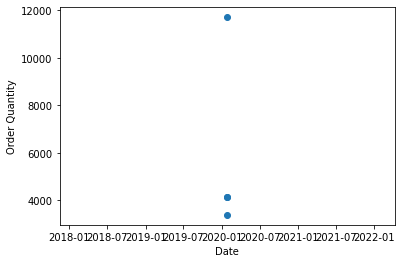

c8-12246740


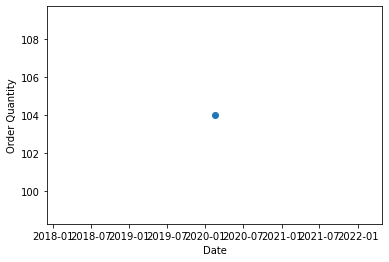

c6-12271469


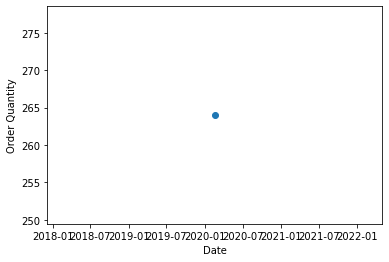

In [ ]:
#plt.figure(figsize=(30,30))

for unique_client_mat in Raw_DF['Client-Material'].unique():
  DF_ClientMat = Raw_DF[Raw_DF['Client-Material'] == unique_client_mat]
  print(unique_client_mat)
  plt.scatter(DF_ClientMat['Date'], DF_ClientMat['Order Quantity'], label = unique_client_mat)
  plt.xlabel('Date')
  plt.ylabel('Order Quantity')
  plt.show()
#plt.legend()


It is found that some clients place multiple orders for the same material on the same day; some clients place orders for the same material on consecutive days. Most order quantities and ordering dates vary largely and do not exhibit apparent trends, such as linearly increasing or decreasing trend, seasonality or exponential trend. Thus, moving average forecasting and linear regression forecasting are used in the following section to predict the purchasing forecast. 

# C. Methods

### Creating All Possible Combinations

The timespan of the given data is three month, from December 2019 to February 2020. No client made purchases for the same material everyday in the three-month period.

To perform moving average and linear regression forecasting, continuous data is required. Thus, a daily material purchase dataframe of all client and all materials is created for forecasting purpose. 

This 'All_Combinations' dataframe contains all possible date-client-material combinations without duplication.

In [ ]:
All_dates = pd.date_range(Raw_DF.Date.min(),Raw_DF.Date.max(),freq='d')
df_alldates = pd.DataFrame(All_dates,columns=['Date'])
DF_Client_Mat_Comb = Raw_DF[['Client','Material']]
Raw_DF_Client_Mat_Unique = DF_Client_Mat_Comb.drop_duplicates()
df_alldates['tmp'] = 1
Raw_DF_Client_Mat_Unique['tmp'] = 1

All_Combinations = pd.merge(Raw_DF_Client_Mat_Unique, df_alldates, on=['tmp'])
All_Combinations = All_Combinations.drop('tmp', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_alldates.shape

(82, 2)

In [ ]:
Raw_DF_Client_Mat_Unique.shape

(118, 3)

In [ ]:
All_Combinations.shape

(9676, 3)

The sum of historical daily purchases of specific material made by each client are calculated and filled into a dataframe containing all the possible date-client-material combinations.

If clients did not make purchases for the specific material on a specific day, the order quantity is filled with 0. 

In [ ]:
Raw_DF_Data = Raw_DF_Data.groupby(by=['Date', 'Client', 'Material']).sum()
Raw_DF_Data = Raw_DF_Data.reset_index()
All_Combinations_DF = pd.merge(All_Combinations, Raw_DF_Data, how = 'left')
All_Combinations_DF.fillna(0, inplace = True)
All_Combinations_DF = All_Combinations_DF.sort_values(['Client', 'Material','Date'], ascending=True)
All_Combinations_DF = All_Combinations_DF.reset_index()
All_Combinations_DF.drop('index', axis = 1, inplace = True)

In [ ]:
All_Combinations_DF

Client  Material       Date  Order Quantity
0        c1  11000851 2019-12-05             0.0
1        c1  11000851 2019-12-06             0.0
2        c1  11000851 2019-12-07             0.0
3        c1  11000851 2019-12-08             0.0
4        c1  11000851 2019-12-09             0.0
...     ...       ...        ...             ...
9671     c9  12293768 2020-02-20             0.0
9672     c9  12293768 2020-02-21             0.0
9673     c9  12293768 2020-02-22             0.0
9674     c9  12293768 2020-02-23             0.0
9675     c9  12293768 2020-02-24             0.0

[9676 rows x 4 columns]

### Prompt For User Input

The user_input function prompts the user to input the required information (client, material, date). There are built-in checks and warning messages in the function to ensure user enters corrent informtation (more details in section D)

In [ ]:
#This function is for the user to input the required information (client, material, date)
def user_input (history_df):

    checker = 3
    unix_epoch = np.datetime64(0, 's')
    one_second = np.timedelta64(1, 's')
    
    history_first_date = (history_df['Date'].unique().min() - unix_epoch) / one_second
    history_last_date = (history_df['Date'].unique().max() - unix_epoch) / one_second

    history_start_date = datetime.utcfromtimestamp(history_first_date).date()
    history_finish_date = datetime.utcfromtimestamp(history_last_date).date()

    while checker > 0:
        client_number = input("Enter Client Number or press enter to skip: ")
        material_number = input("Enter Material Number or press enter to skip: ")
        future_date = input("Enter date in the form of year-month-day (example: 2022-01-05): ")

        if future_date == '':
            print("Date cannot be empty")
        else:
            checker-=1
            future_date1 = [int(i) for i in future_date.split("-")]
            future_date2 = date(future_date1[0], future_date1[1], future_date1[2])

            if (future_date2-history_start_date).days < 0:
                print("Date provided is earlier than the earlist record")
            else:
                checker-=1

        if client_number == '' and material_number == '':
            print("Client Number and Material Number cannot both be empty.")
        elif client_number != '' and client_number not in history_df['Client'].unique():
            print("Client does not exist")
        elif material_number != '' and material_number not in history_df['Material'].unique():
            print('Material does not exist')
        else:
            checker-=1

        if checker > 0:
            print("Please try again!")
            checker = 3
    future_day = (future_date2 - history_start_date).days

    return client_number, material_number, future_day

## C.a. Moving Average Demand Forecasting


Moving average is a simple statistical analysis tool that is used to smooth out data trends by filtering out the noise and outliers caused by short-term random fluctuations. It creates a series of averages using different continuous subsets of a larger or full dataset. 

In this analysis, simple moving average is calculated. The order forecast for time period t is the arithmetic mean of material quantity ordered for the previous k time periods. Weighted moving average is not used because there is no sign of different weights of the order quantity or dates. Exponential moving averages is not used in this case because there was no demonstrated greater importance in the more recent purchases compared to the older ones.

The moving average window, k, is the number of observations made for the forecast. Small moving average window will result in quickly reacting forecast based on the observations in the immediate past; yet it could be too reactionary.  Large window will create more robust forecast to noise and small variation, yet it may be changing too slowly. Due to the short timespan and the limited amount of the given data, we decide to use a 3-day window in this analysis.

In modern industry practices, the moving average algorithm is commonly used in finance, stocking market specifically. The reason for using the moving average is to smooth out the price by creating a constantly updated average price. Applicable in the forecasting scenario, the moving average technique can reduce the impacts of random, short-term fluctuations on the demand over a specified timeframe. 

Moving averages is customizable in terms of timeframe selection, which is reflected in the periods term in the algorithm. Longer periods generally means less sensitive average predictions.

Here we create a dataframe containing all the possible combinations of date-client-material and the corresponding material order quantity in the past. The dataframe is sorted in ascending order.

In [ ]:
# for moving average, we need to include one more day at the end
# therefore, we will repeat the above steps

from datetime import datetime, timedelta

All_dates_plus1 = pd.date_range(Raw_DF.Date.min(),Raw_DF.Date.max() + timedelta(days=1),freq='d')
df_alldates_plus1 = pd.DataFrame(All_dates_plus1,columns=['Date'])
DF_Client_Mat_Comb_MA = Raw_DF[['Client','Material']]
Raw_DF_Client_Mat_Unique_MA = DF_Client_Mat_Comb_MA.drop_duplicates()
df_alldates_plus1['tmp'] = 1
Raw_DF_Client_Mat_Unique_MA['tmp'] = 1

All_Combinations_MA = pd.merge(Raw_DF_Client_Mat_Unique_MA, df_alldates_plus1, on=['tmp'])
All_Combinations_MA = All_Combinations_MA.drop('tmp', axis=1)

All_Combinations_DF_MA = pd.merge(All_Combinations_MA, Raw_DF_Data, how = 'left')
All_Combinations_DF_MA.fillna(0, inplace = True)
All_Combinations_DF_MA = All_Combinations_DF_MA.sort_values(['Client', 'Material','Date'], ascending=True)
All_Combinations_DF_MA = All_Combinations_DF_MA.reset_index()
All_Combinations_DF_MA.drop('index', axis = 1, inplace = True)

All_Combinations_DF_MA = All_Combinations_DF_MA.groupby(by = ['Date', 'Client', 'Material', 'Order Quantity']).sum()
All_Combinations_DF_MA = All_Combinations_DF_MA.reset_index()
All_Combinations_DF_MA = All_Combinations_DF_MA.sort_values(['Client', 'Material','Date'], ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Three different dataframes are created for faster data extraction when the user enter different inputs. The possible user input combinations are:
- client & date
- material & date
- client, material and date

The moving average with 3-day window is calculated and stored in the 'Moving Average' column, using the 'rolling' function of pandas dataframe. 

In [ ]:
# group the three conditions into 3 unique dataframes:

#1 given client and date only
MA_Client = All_Combinations_DF_MA[['Date','Client', 'Order Quantity']]
MA_Client_Group = MA_Client.groupby(by=['Client', 'Date'], dropna=False).sum()
#.mean()
#2 given material and date only
MA_Material = All_Combinations_DF_MA[['Date','Material', 'Order Quantity']]
MA_Material_Group = MA_Material.groupby(by=['Material', 'Date'], dropna=False).sum()
#.mean()
# given material and client and date
MA_Client_Material = All_Combinations_DF_MA[['Date','Material', 'Client', 'Order Quantity']]
MA_Client_Material_Group = MA_Client_Material.groupby(by=['Client', 'Material', 'Date'], dropna=False).mean()
#.mean()

# then calculate the rolling average (MA): window 3
# renaming it to Moving Average

#MA_Client_Group_Rolling = MA_Client_Group.groupby(['Client','Date']).agg({'Order Quantity':'mean'}).rolling(3).mean()
MA_Client_Group_Rolling = MA_Client_Group.groupby(level = 0, group_keys=False).rolling(3).mean()
MA_Client_Group_Rolling.rename(columns={"Order Quantity": "Moving Average"}, inplace = True)
MA_Client_Group_Rolling = MA_Client_Group_Rolling.reset_index()
MA_Client_Group_Rolling.drop(MA_Client_Group_Rolling.columns[0],axis=1,inplace=True)

#MA_Material_Group_Rolling = MA_Material_Group.groupby(['Material','Date']).agg({'Order Quantity':'mean'}).rolling(3).mean()
MA_Material_Group_Rolling = MA_Material_Group.groupby(level = 0, group_keys=False).rolling(3).mean()
MA_Material_Group_Rolling.rename(columns={"Order Quantity": "Moving Average"}, inplace = True)
MA_Material_Group_Rolling = MA_Material_Group_Rolling.reset_index()
MA_Material_Group_Rolling.drop(MA_Material_Group_Rolling.columns[0],axis=1,inplace=True)

#MA_Client_Material_Group_Rolling = MA_Client_Material_Group.groupby(['Client','Material','Date']).agg({'Order Quantity':'mean'}).rolling(3).mean()
MA_Client_Material_Group_Rolling = MA_Client_Material_Group.groupby(level = [0,1], group_keys=False).rolling(3).mean()
MA_Client_Material_Group_Rolling.rename(columns={"Order Quantity": "Moving Average"}, inplace = True)
MA_Client_Material_Group_Rolling = MA_Client_Material_Group_Rolling.reset_index()
MA_Client_Material_Group_Rolling.drop(MA_Client_Material_Group_Rolling.columns[[0,1]],axis=1,inplace=True)

MA_Client_Group = MA_Client_Group.reset_index()
MA_Material_Group = MA_Material_Group.reset_index()
MA_Client_Material_Group = MA_Client_Material_Group.reset_index()

# merge the MA df back with the actual order df

MA_Client_DF = pd.concat([MA_Client_Group, MA_Client_Group_Rolling], axis=1)
MA_Material_DF = pd.concat([MA_Material_Group, MA_Material_Group_Rolling], axis=1)
MA_Client_Material_DF = pd.concat([MA_Client_Material_Group, MA_Client_Material_Group_Rolling], axis=1)

# subtract date from the first day of the given data for user input function later
MA_Client_DF = MA_Client_DF.assign(Day=lambda df: df['Date'].map(lambda date: (date - np.datetime64('2019-12-05')).days))
MA_Material_DF = MA_Material_DF.assign(Day=lambda df: df['Date'].map(lambda date: (date - np.datetime64('2019-12-05')).days))
MA_Client_Material_DF = MA_Client_Material_DF.assign(Day=lambda df: df['Date'].map(lambda date: (date - np.datetime64('2019-12-05')).days))


In [ ]:
MA_Client_DF

Client       Date  Order Quantity  Moving Average  Day
0       c1 2019-12-05             0.0             NaN    0
1       c1 2019-12-06             0.0             NaN    1
2       c1 2019-12-07             0.0             0.0    2
3       c1 2019-12-08             0.0             0.0    3
4       c1 2019-12-09             0.0             0.0    4
..     ...        ...             ...             ...  ...
825     c9 2020-02-21             0.0          6530.0   78
826     c9 2020-02-22             0.0             0.0   79
827     c9 2020-02-23             0.0             0.0   80
828     c9 2020-02-24             0.0             0.0   81
829     c9 2020-02-25             0.0             0.0   82

[830 rows x 5 columns]

In [ ]:
MA_Material_DF

Material       Date  Order Quantity  Moving Average  Day
0     11000851 2019-12-05           660.0             NaN    0
1     11000851 2019-12-06             0.0             NaN    1
2     11000851 2019-12-07             0.0      220.000000    2
3     11000851 2019-12-08             0.0        0.000000    3
4     11000851 2019-12-09             0.0        0.000000    4
...        ...        ...             ...             ...  ...
1655  12404641 2020-02-21           610.0      530.000000   78
1656  12404641 2020-02-22             0.0      301.333333   79
1657  12404641 2020-02-23             0.0      203.333333   80
1658  12404641 2020-02-24           108.0       36.000000   81
1659  12404641 2020-02-25             0.0       36.000000   82

[1660 rows x 5 columns]

In [ ]:
MA_Client_Material_DF

Client  Material       Date  Order Quantity  Moving Average  Day
0        c1  11000851 2019-12-05             0.0             NaN    0
1        c1  11000851 2019-12-06             0.0             NaN    1
2        c1  11000851 2019-12-07             0.0             0.0    2
3        c1  11000851 2019-12-08             0.0             0.0    3
4        c1  11000851 2019-12-09             0.0             0.0    4
...     ...       ...        ...             ...             ...  ...
9789     c9  12293768 2020-02-21             0.0             0.0   78
9790     c9  12293768 2020-02-22             0.0             0.0   79
9791     c9  12293768 2020-02-23             0.0             0.0   80
9792     c9  12293768 2020-02-24             0.0             0.0   81
9793     c9  12293768 2020-02-25             0.0             0.0   82

[9794 rows x 6 columns]

Depending on the user input, the moving average predict function extracts the forecasted average from the previously constructed dataframe containing rolling window average. More details will be discussed in section D.

In [ ]:
def MA_predict (client, material, day):

    # number of days in the given data
    c = Raw_DF.Date.max() - Raw_DF.Date.min()
    his_days = c.days

    # select the appropriate dataframe
    # given client and material -> use the MA_Client_Material_DF
    if client != '' and material != '':
        temp0 = MA_Client_Material_DF[MA_Client_Material_DF['Client'] == client]
        temp1 = temp0[temp0['Material'] == material]

    # given material -> use the MA_Material_DF
    elif client == '':
        temp1 = MA_Material_DF[MA_Material_DF['Material'] == material]
    
    # given client -> use the MA_Client_DF
    elif material == '':
        temp1 = MA_Client_DF[MA_Client_DF['Client'] == client]
        
    ##################################################################################
    # if the user input day is smaller than or equal to the his_days, 
    # output the forecast of the corresponding day directly

    if 2 <= day <= his_days:
        res = temp1.loc[temp1['Day'] == day, 'Moving Average'].iloc[0]

    # if smaller than 2 days, forecast is not available
    elif day <2:
        res = 'No forecast available'

    # if the user input day is larger than the his_days, return the last forecast as future forecast
    elif day > his_days:
        res = temp1['Moving Average'].iloc[-1]
        
    return res

## C.b. Linear Regresssion Demand Forecasting

The second method used for prediction is linear regression. Linear regression is a machine learning method that attempts to determine the relationship between variables by finding the linear equation that best fits the provided data. Linear regression can be both single-variable and multivariable. Single variable linear regression only has one input variable X, whereas multivariable linear regression has more than one input variable (X1, X2, X3 etc…). Through minimizing residue error between the linear equation and known data points, each input variable is assigned an optimal weight. In addition, there is one extra term to account for bias.

There are three inputs that an user could provide for prediction, namely client number, material number and the date to forecast demand for. However, not all three inputs are variables used in the linear regression algorithm. The program takes the client number and material number and matches them with historical data, then produces a new dataframe that just contains historical data with the selected client number and material number.

Using this new dataframe, a linear equation can be developed based on the best-fitting line for the historical data (with specified client number and material number). The only real input variable for linear regression is the date. Since date cannot be a direct input for linear regression, all the dates in the historical record are converted to a numerical value, which is the number of days a date is away from the earliest date in the historical record. The linear equation has one input X (the number of days passed since day 0), and one output y (the predicted order quantity). With this linear equation, we can use the date that was provided by the user, convert it into "day x", and feed it into the equation, and obtain the predicted order quantity on the specified date.

In the case that the user only provides a client number (no material number) and a future date, the new dataframe would contain all materials that the client ever purchased, aggregated by day. The model would forecast aggregate demand for all the materials from the given client on the given future date. Similarly, if the user only provides a material number (no client number) and a future date, the new dataframe would contain all clients that ever purchased the material, aggregated by day. The model would forecast aggregate demand for the given material from all clients on the given future date.

Since linear regression is a machine learning algorithm, the dataset given is split into training and testing dataset, where training dataset is used to train the model and the testing dataset is to evaluate the performance of the model and compare the predicted values with expected values. Normally, the splitting of training and testing dataset should be random to ensure that they are representative of the dataset. However, the same method cannot be used in our dataset, because we are dealing with a time-series problem. If the train and test datasets are randomly selected, it is possible that data in a later date is in the training set, and data in an earlier date is in the test set, we would be using future data to predict past data, which does not make sense, this is known as data leakage. Data leakage can cause the prediction accuracy to be a lot better than the model is capable of, creating a faulty model that is not useful when put to test with true future data that the model has not seen before.

To avoid data leakage, we manually split the train and test dataset by date, the number of dates included in the train set and test set is 66 and 16 respectively (roughly 80-20 split). All the data entry before 2020-02-09 will be included in the train dataset and the rest of data entry will be in the test dataset.

The linear regression model is a versatile and robust prediction method, it does not require the data to be stationary and can capture trend and seasonality well without much adjustment. However, given the limited features in the dataset, and the lack of clear dependent relationship between the input and output variables, it might not perform as well as some other simpler statistical models, as the moving average result is comparatively better than that of linear regression.

In [ ]:
#manually split train and test dataset (66:16), split the data manually with 0.2 train/test ratio.
train = All_Combinations_DF[All_Combinations_DF['Date']<'2020-02-09']
test = All_Combinations_DF[All_Combinations_DF['Date']>'2020-02-08']

We need to create a new column in the dataframe to record the days away from day 0 (2019-12-05), since the linear regression does not take "date" as a valid input.

In [ ]:
#create a new column in dataframe called "day" to record the days away from day 0 (2019-12-05)
All_Combinations_DF2=All_Combinations_DF.copy()
All_Combinations_DF2 = All_Combinations_DF2.assign(Day=lambda df: df['Date'].map(lambda date: (date - np.datetime64('2019-12-05')).days))
All_Combinations_DF2

Client  Material       Date  Order Quantity  Day
0        c1  11000851 2019-12-05             0.0    0
1        c1  11000851 2019-12-06             0.0    1
2        c1  11000851 2019-12-07             0.0    2
3        c1  11000851 2019-12-08             0.0    3
4        c1  11000851 2019-12-09             0.0    4
...     ...       ...        ...             ...  ...
9671     c9  12293768 2020-02-20             0.0   77
9672     c9  12293768 2020-02-21             0.0   78
9673     c9  12293768 2020-02-22             0.0   79
9674     c9  12293768 2020-02-23             0.0   80
9675     c9  12293768 2020-02-24             0.0   81

[9676 rows x 5 columns]

In [ ]:
#create a new column in dataframe called "Day" to record the days away from day 0 (2019-12-05) in the training set
train = train.assign(Day=lambda df: df['Date'].map(lambda date: (date - np.datetime64('2019-12-05')).days))
train

Client  Material       Date  Order Quantity  Day
0        c1  11000851 2019-12-05             0.0    0
1        c1  11000851 2019-12-06             0.0    1
2        c1  11000851 2019-12-07             0.0    2
3        c1  11000851 2019-12-08             0.0    3
4        c1  11000851 2019-12-09             0.0    4
...     ...       ...        ...             ...  ...
9655     c9  12293768 2020-02-04             0.0   61
9656     c9  12293768 2020-02-05             0.0   62
9657     c9  12293768 2020-02-06             0.0   63
9658     c9  12293768 2020-02-07             0.0   64
9659     c9  12293768 2020-02-08             0.0   65

[7788 rows x 5 columns]

The lin_reg_predict function is used to predict the order quantity of a given date, with specified client number and/or material number, using sklearn linear regression model. (More details in section D）

In [ ]:
#Use linear regression to forecast the order quantity according to the three different scenarios

def lin_reg_predict (client, material, day, history_df):
    if client != '' and material != '':
        temp1 = history_df[history_df['Client']==client]
        temp2 = temp1[temp1['Material']==material]
        reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))
        #print(reg.coef_, reg.intercept_)
        return reg.predict(day)
    
    elif client == '':
        temp1 = history_df[history_df['Material']==material]
        temp2 = temp1.groupby(by=['Day']).sum().reset_index()
        reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))
        #print(reg.coef_, reg.intercept_)
        return reg.predict(day)
  
    elif material == '':
        temp1 = history_df[history_df['Client']==client]
        temp2 = temp1.groupby(by=['Day']).sum().reset_index()
        reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))
        #print(reg.coef_, reg.intercept_)
        return reg.predict(day)

## Visualizations of Demand Forecasting

#### Moving Average

The following aggregated demand forecasting graphs show the actual demand and the calculated moving average forecast to give a direct visual of the performance of the moving average model. For demonstration purpose, only the overall average are plotted, i.e. 

Graph 1 is the client only case scenario where for a given client only (no material), the forecast is based on the aggregated sum from all materials based on this client. 

Graph 2 is the client only case scenario where for a given material only (no material), the forecast is based on the aggregated sum from this material based on all clients. 

Graph 3 is the client material case where each client and material prediction is aggregated on its own. 

All graphs have been aggregated by dates and quantities to effectively show the overall trends.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


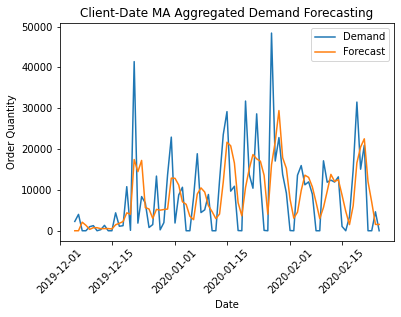

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


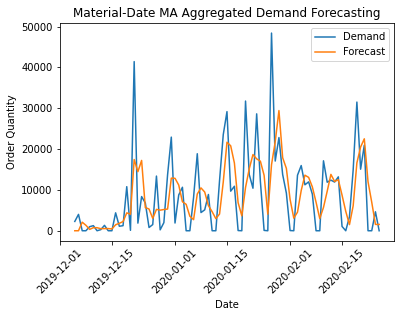

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


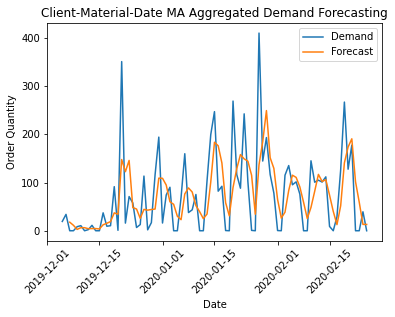

In [ ]:
MA_Client_DF_Visual = MA_Client_DF[['Date','Order Quantity','Moving Average']].groupby(by=['Date'], dropna=False).sum()
MA_Client_DF_Visual = MA_Client_DF_Visual.reset_index()
plt.title('Client-Date MA Aggregated Demand Forecasting')
ma_fig1_actual = sns.lineplot(MA_Client_DF_Visual['Date'], MA_Client_DF_Visual['Order Quantity'], label = 'Demand')
ma_fig1_pred = sns.lineplot(MA_Client_DF_Visual['Date'], MA_Client_DF_Visual['Moving Average'], label = 'Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()

MA_Material_DF_Visual = MA_Material_DF[['Date','Order Quantity','Moving Average']].groupby(by=['Date'], dropna=False).sum()
MA_Material_DF_Visual = MA_Material_DF_Visual.reset_index()
plt.title('Material-Date MA Aggregated Demand Forecasting')
ma_fig2_actual = sns.lineplot(MA_Material_DF_Visual['Date'], MA_Material_DF_Visual['Order Quantity'], label = 'Demand')
ma_fig2_pred = sns.lineplot(MA_Material_DF_Visual['Date'], MA_Material_DF_Visual['Moving Average'], label = 'Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()

MA_Client_Material_DF_Visual = MA_Client_Material_DF[['Date','Order Quantity','Moving Average']].groupby(by=['Date'], dropna=False).mean()
MA_Client_Material_DF_Visual = MA_Client_Material_DF_Visual.reset_index()
plt.title('Client-Material-Date MA Aggregated Demand Forecasting')
ma_fig3_actual = sns.lineplot(MA_Client_Material_DF_Visual['Date'], MA_Client_Material_DF_Visual['Order Quantity'], label = 'Demand')
ma_fig3_pred = sns.lineplot(MA_Client_Material_DF_Visual['Date'], MA_Client_Material_DF_Visual['Moving Average'], label = 'Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Linear Regression

In [ ]:
#Predict the demand for all combinations in the dataset

predict=[]

for i in range(0,9676): 
    pred = lin_reg_predict (All_Combinations_DF2.iloc[i]['Client'], All_Combinations_DF2.iloc[i]['Material'],np.array(All_Combinations_DF2.iloc[i]['Day']).reshape(1,-1), train)
    predict.extend(pred.tolist()[0])

All_Combinations_DF2['predict_linreg']=predict
All_Combinations_DF2

Client  Material       Date  Order Quantity  Day  predict_linreg
0        c1  11000851 2019-12-05             0.0    0      -19.502488
1        c1  11000851 2019-12-06             0.0    1      -16.953693
2        c1  11000851 2019-12-07             0.0    2      -14.404899
3        c1  11000851 2019-12-08             0.0    3      -11.856104
4        c1  11000851 2019-12-09             0.0    4       -9.307310
...     ...       ...        ...             ...  ...             ...
9671     c9  12293768 2020-02-20             0.0   77     1247.030748
9672     c9  12293768 2020-02-21             0.0   78     1267.078426
9673     c9  12293768 2020-02-22             0.0   79     1287.126104
9674     c9  12293768 2020-02-23             0.0   80     1307.173781
9675     c9  12293768 2020-02-24             0.0   81     1327.221459

[9676 rows x 6 columns]

In [ ]:
#Create 2 lists for unique materials and clients
material_list = All_Combinations_DF2.Material.unique()
client_list = All_Combinations_DF2.Client.unique()

200 plots (10 clients*20 materials) are created for each client/material combination to display the actual order quantity and the forecasted demand. For some of the plots that are blank, indicates that the client did not order any of the material in the given period of time. For most of the plots, the actual and forecasted demand show an increase trend, only few of the plots show slightly decreasing trend.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

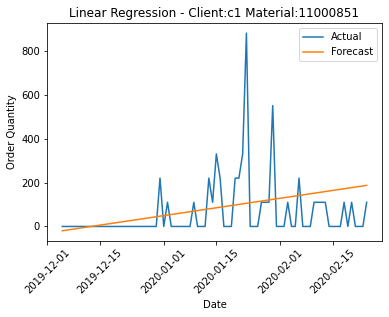

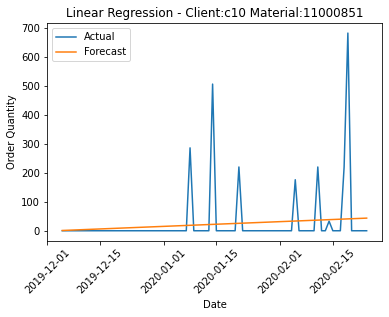

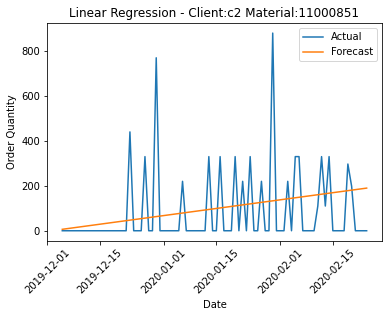

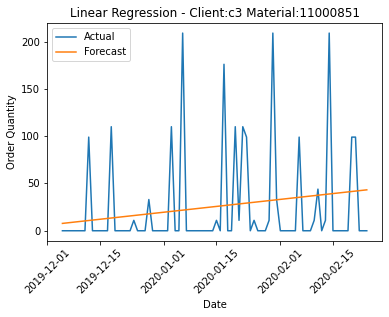

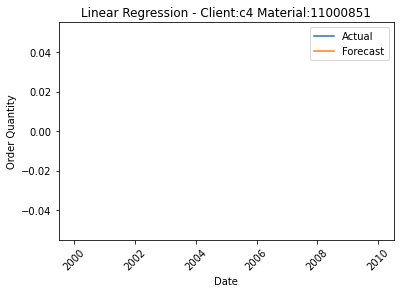

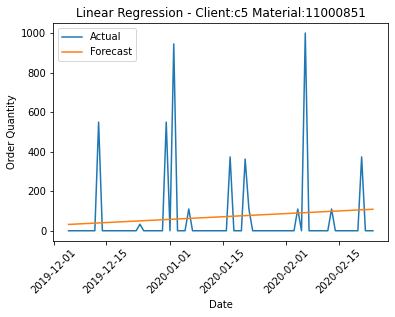

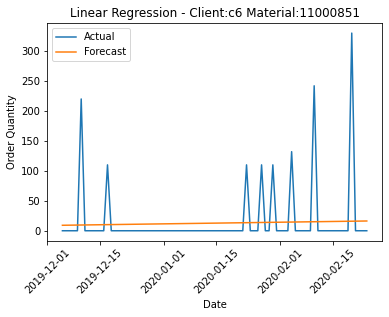

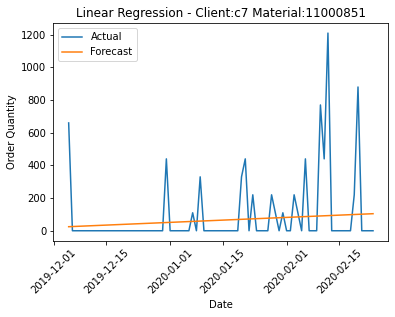

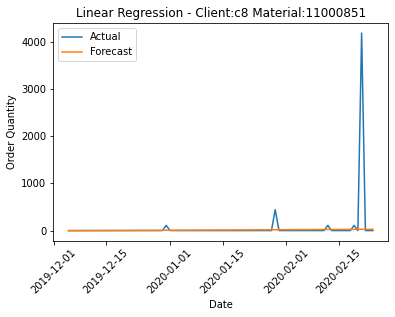

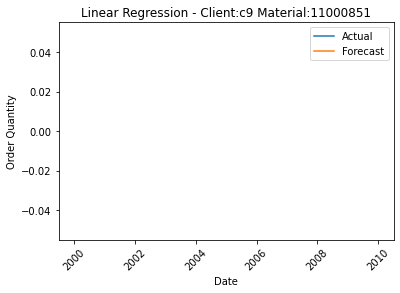

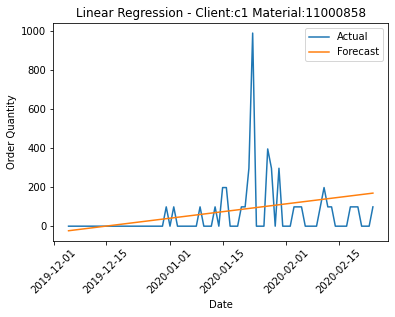

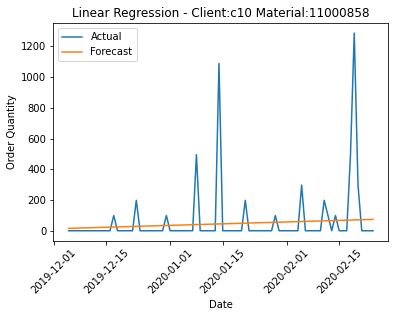

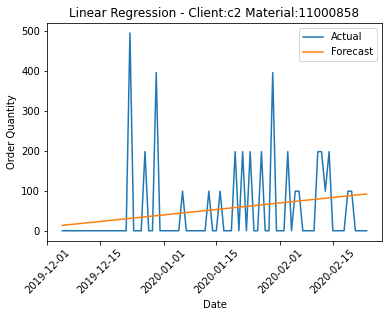

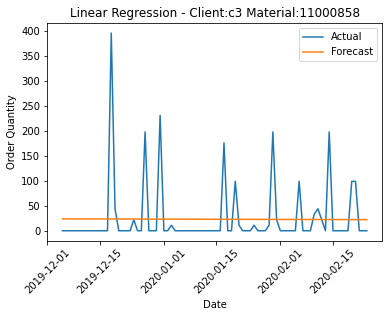

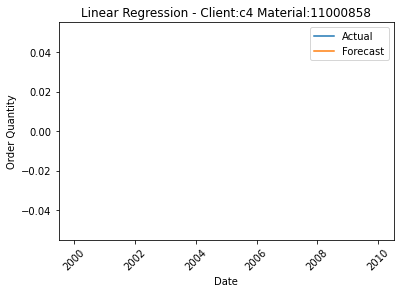

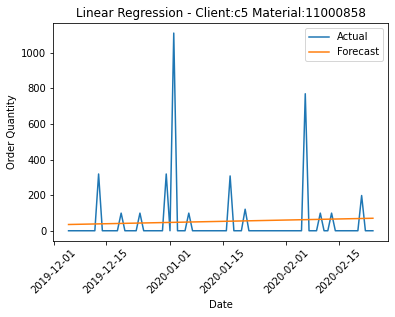

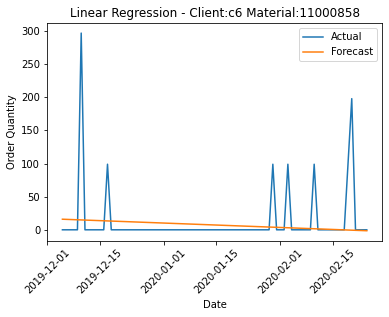

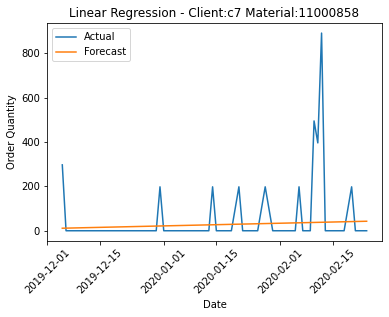

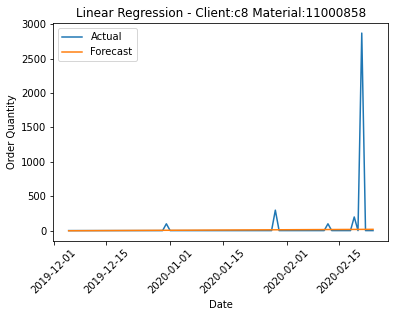

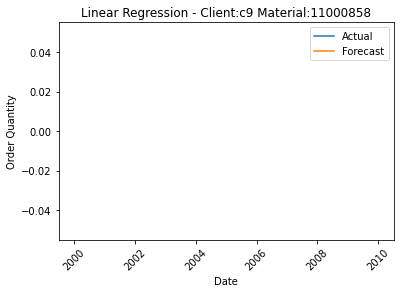

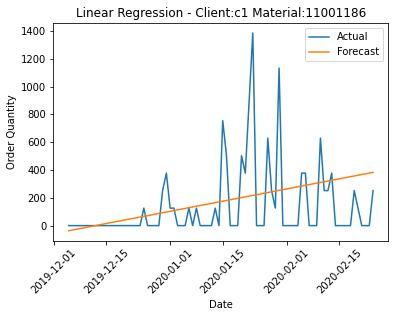

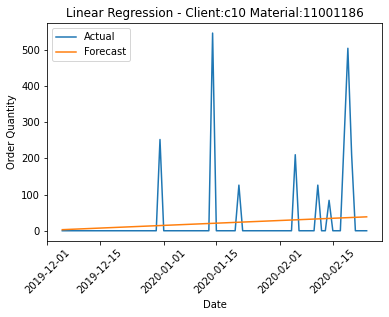

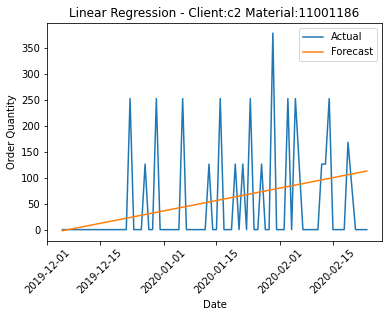

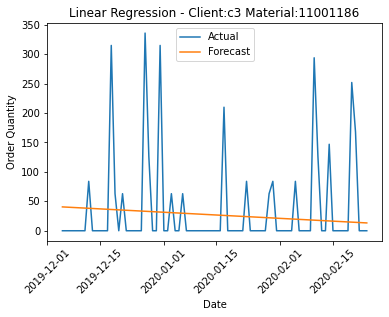

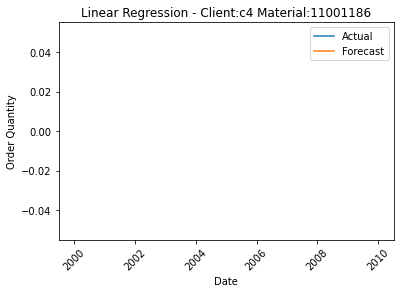

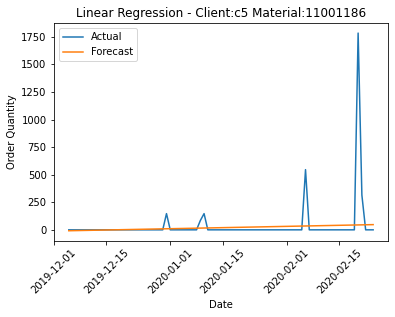

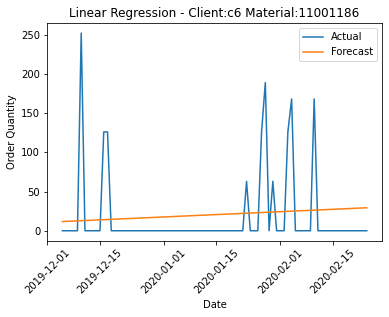

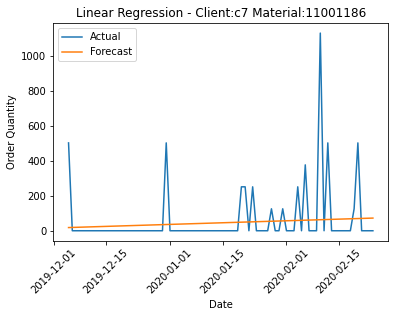

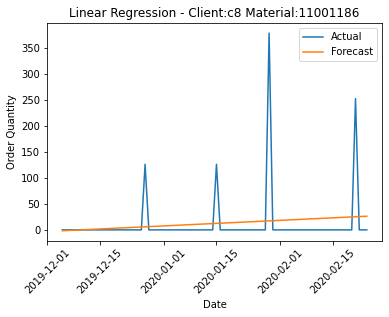

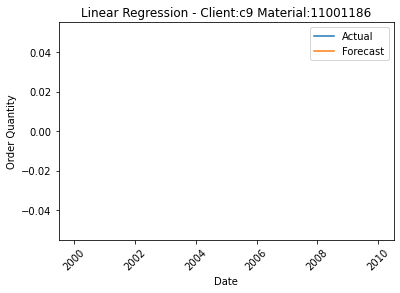

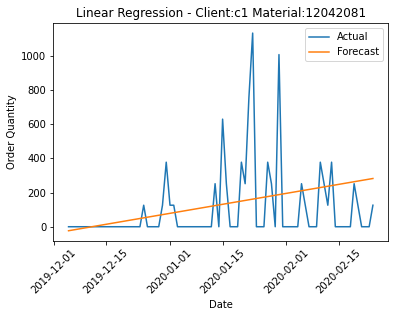

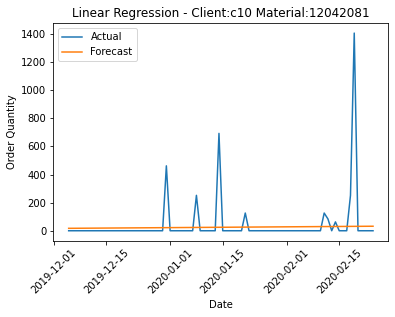

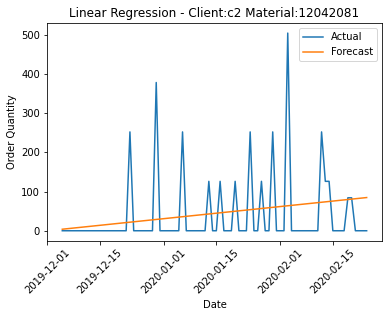

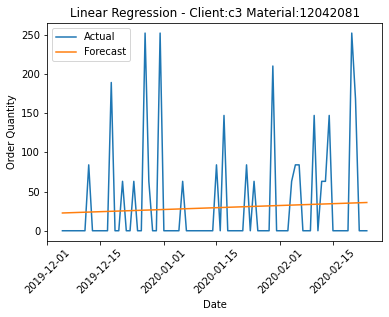

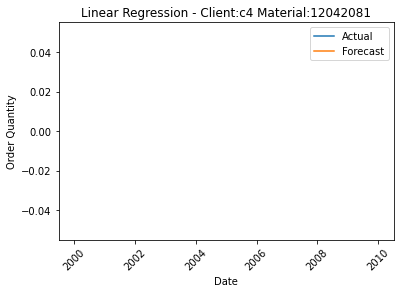

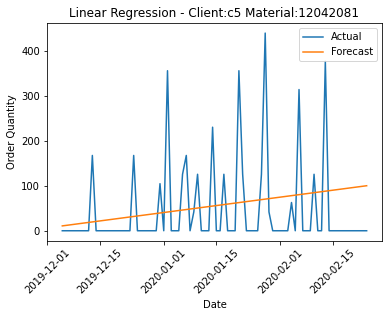

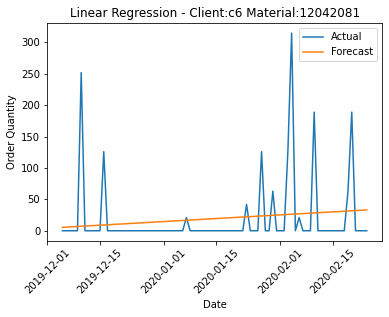

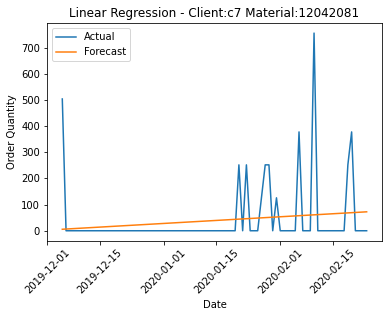

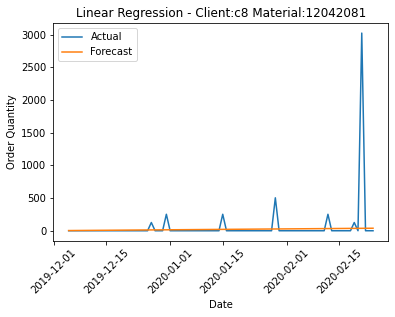

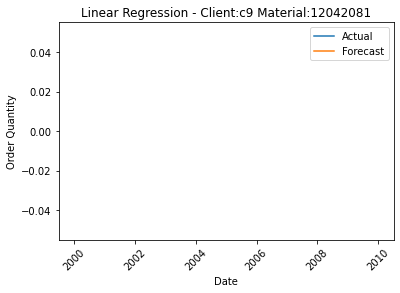

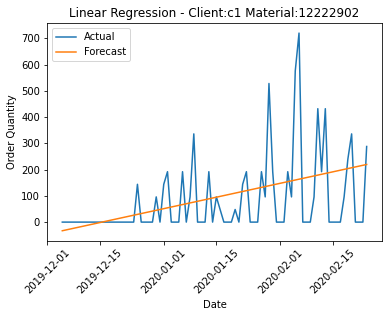

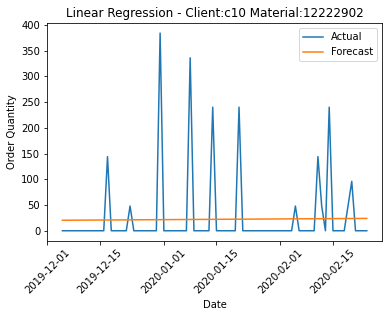

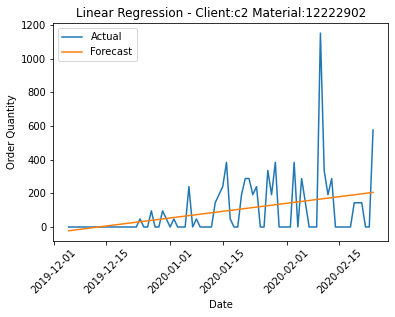

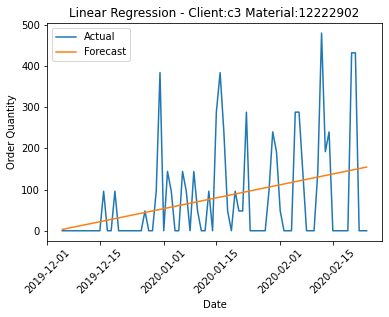

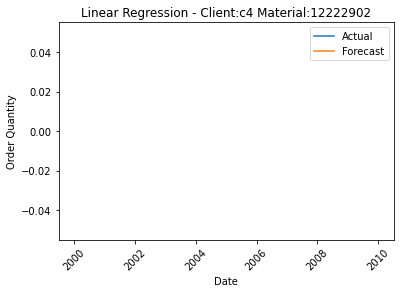

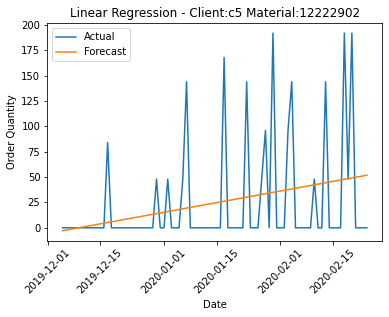

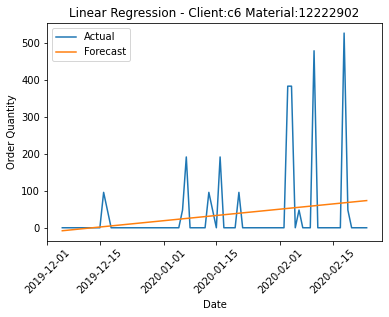

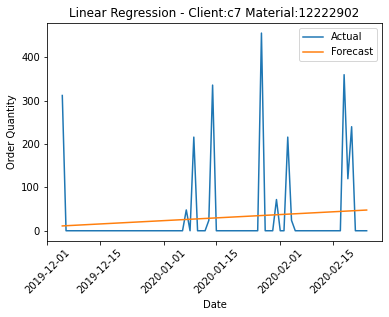

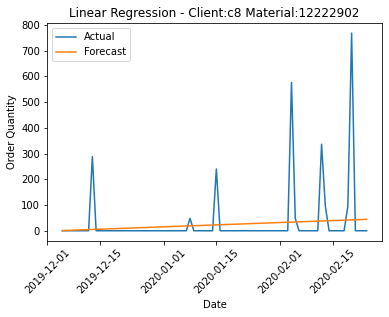

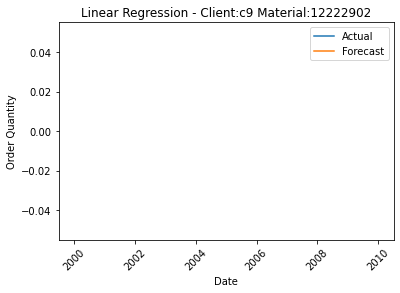

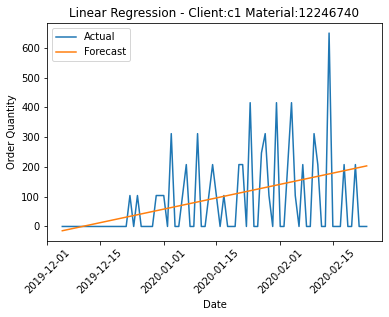

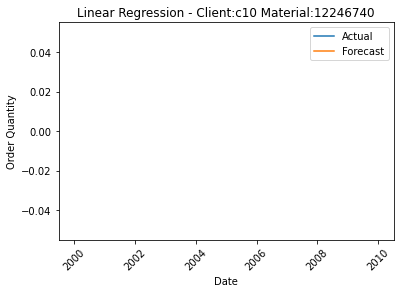

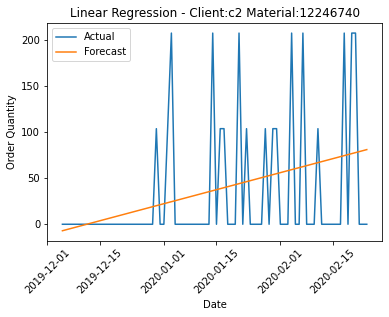

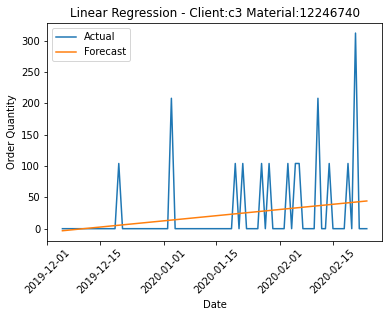

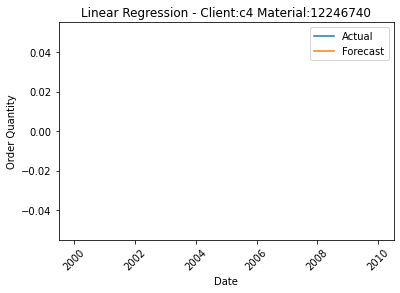

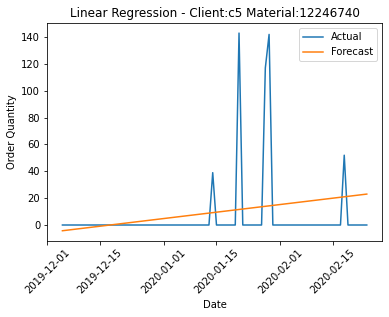

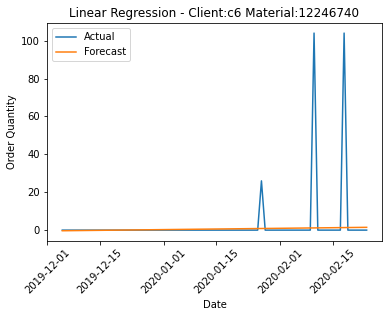

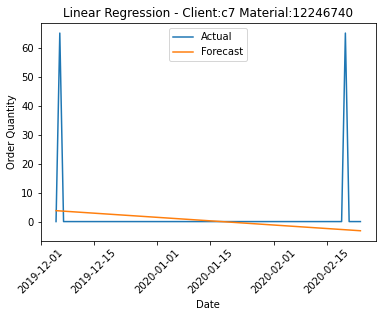

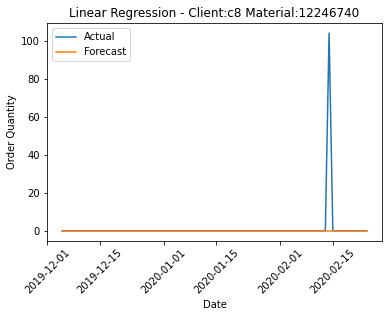

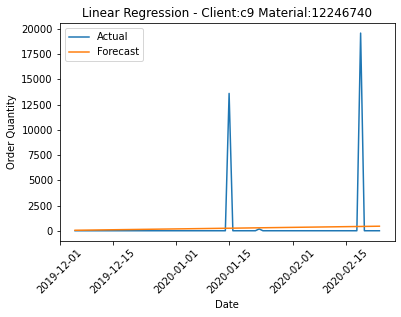

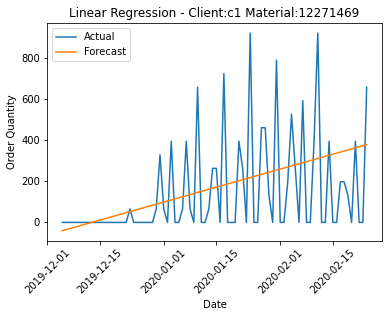

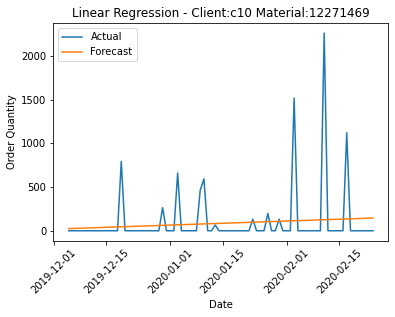

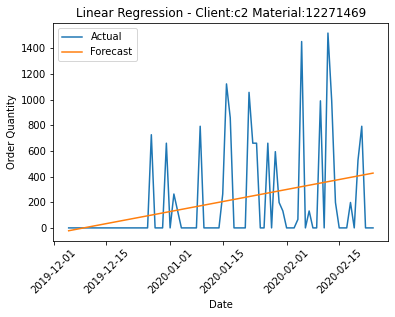

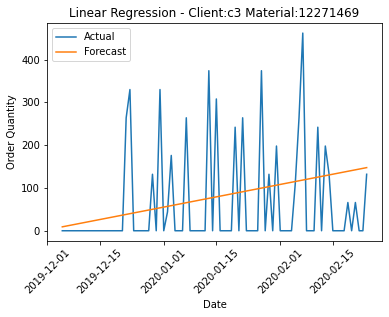

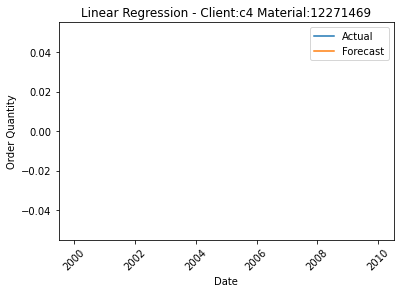

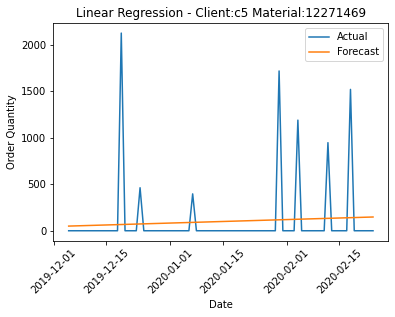

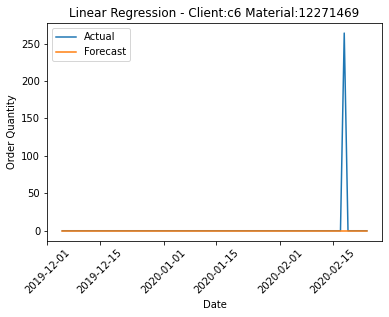

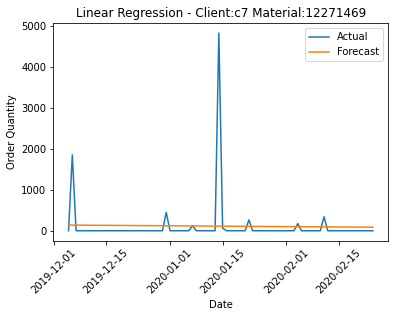

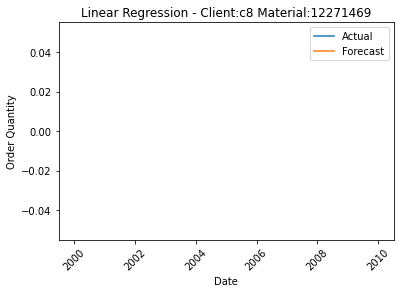

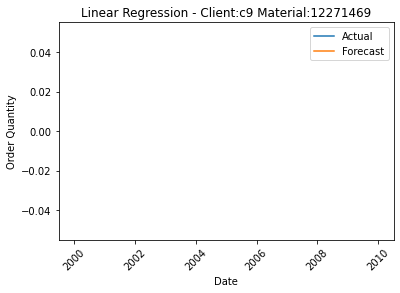

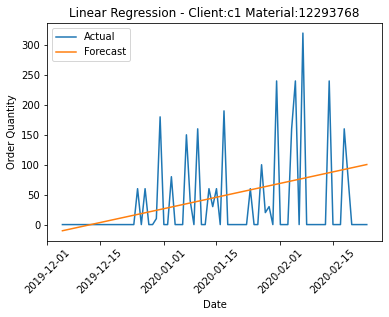

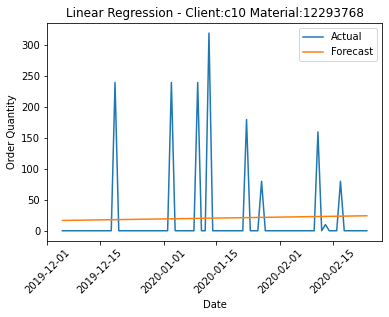

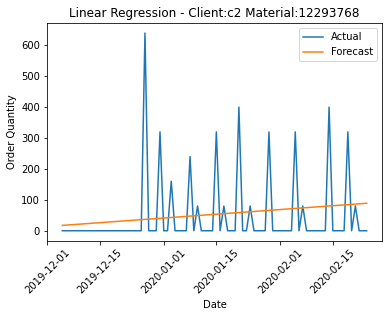

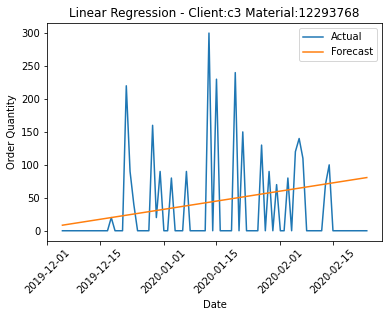

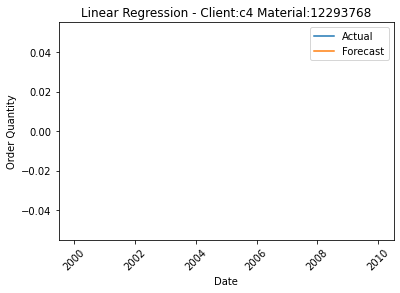

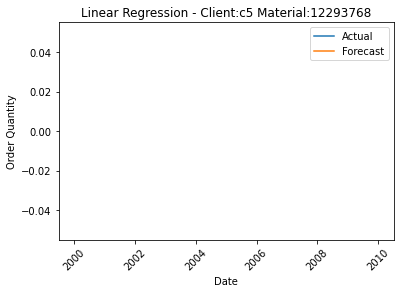

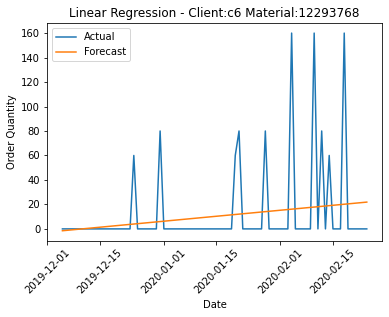

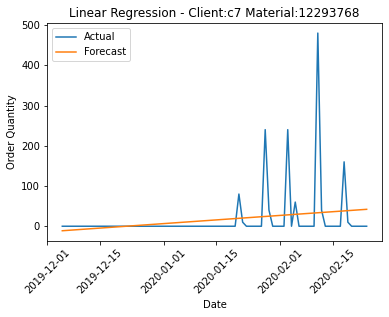

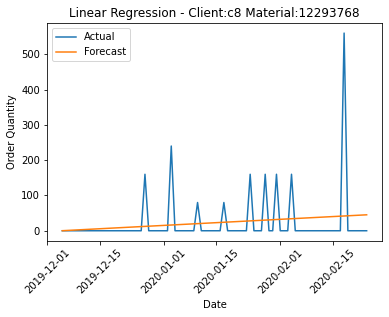

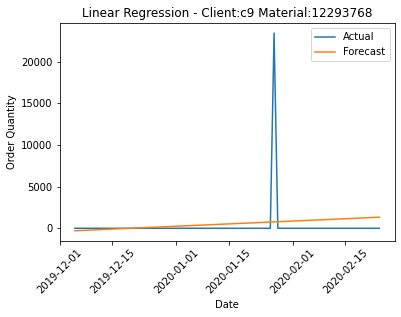

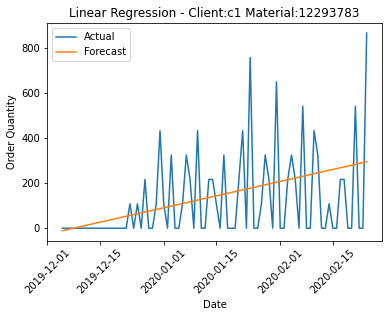

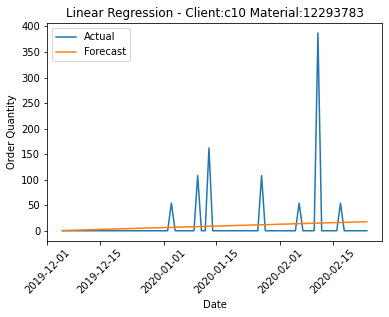

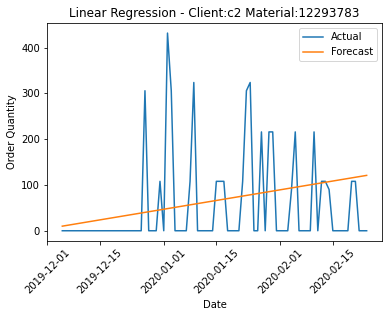

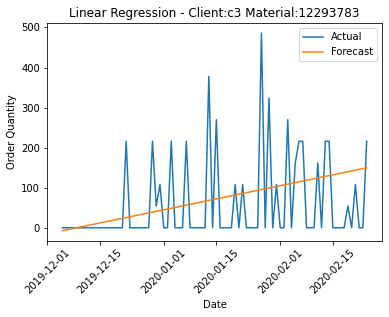

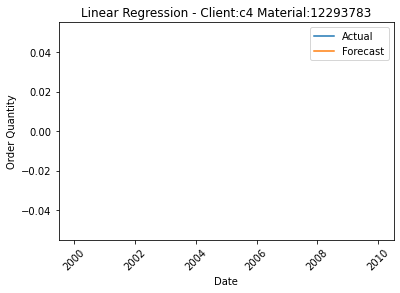

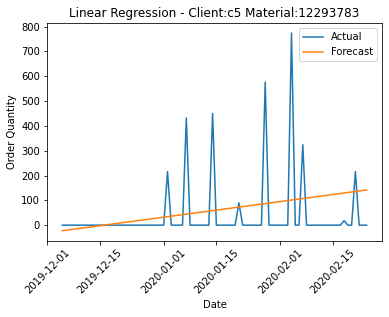

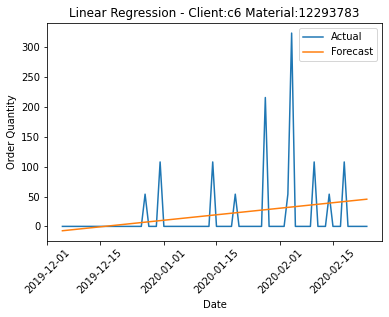

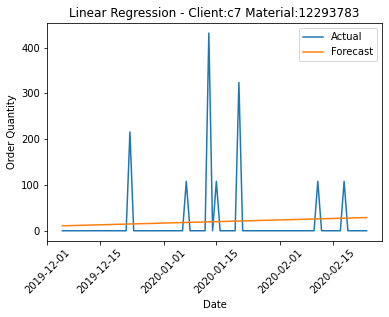

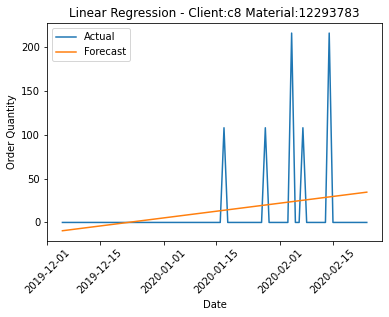

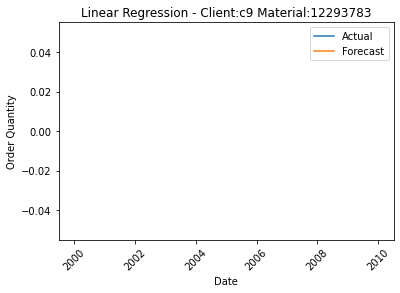

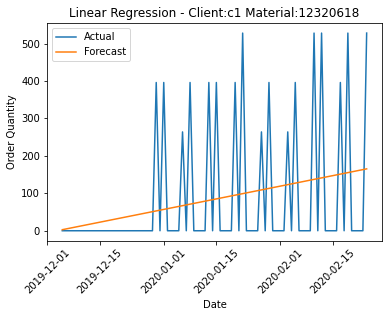

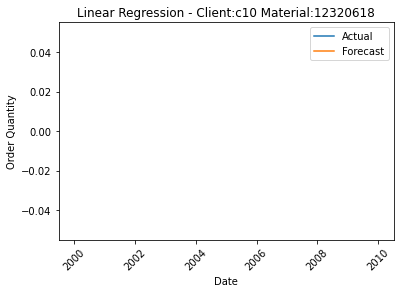

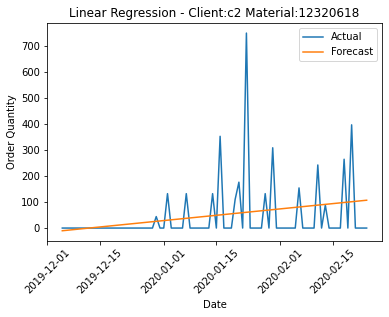

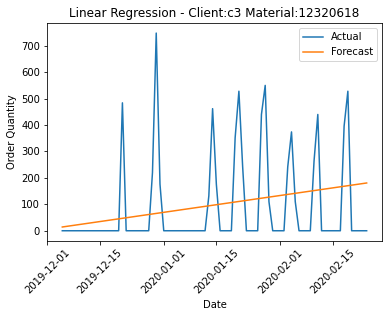

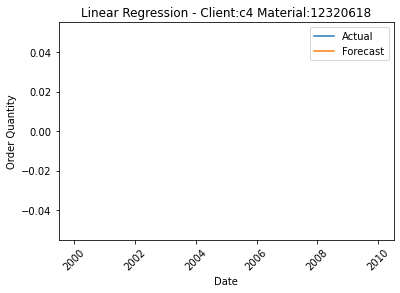

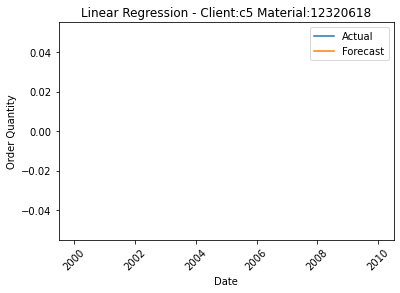

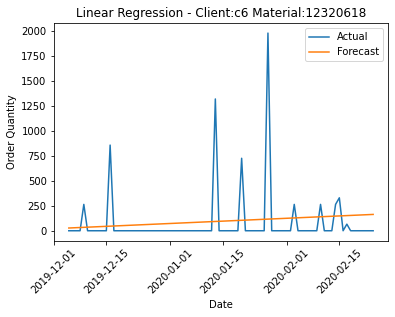

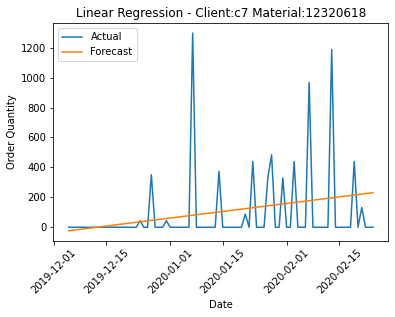

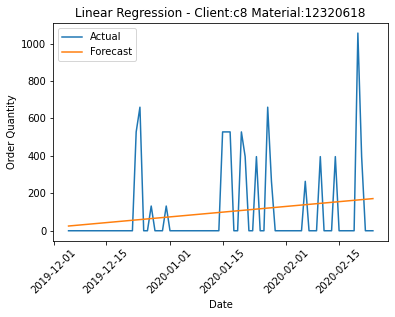

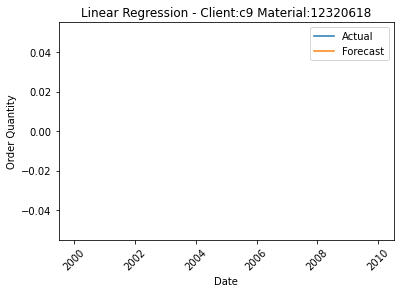

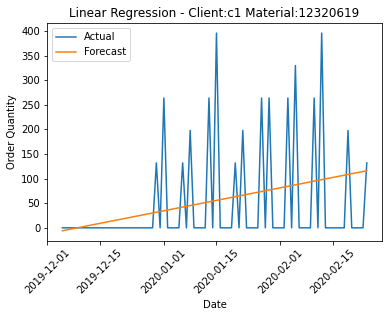

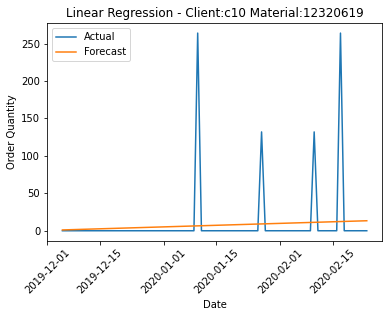

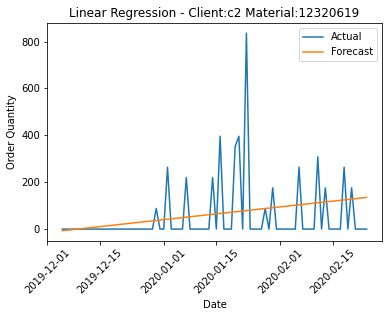

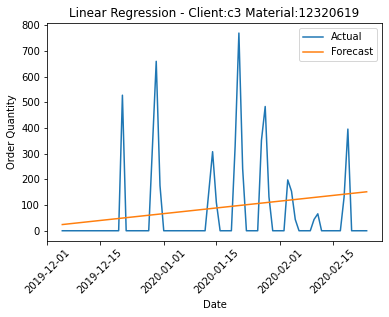

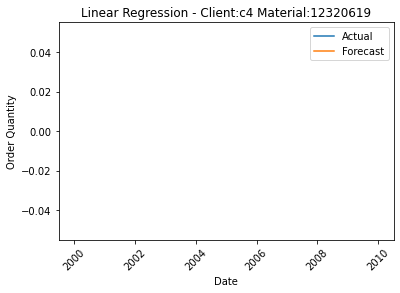

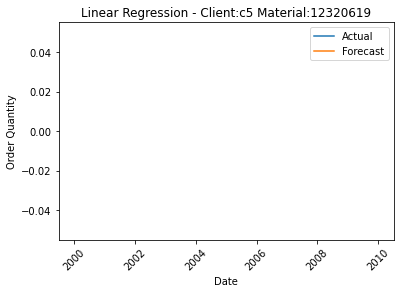

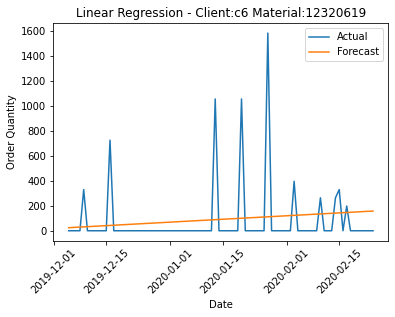

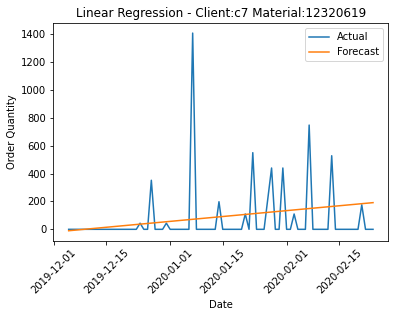

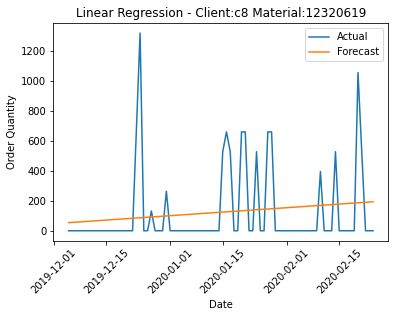

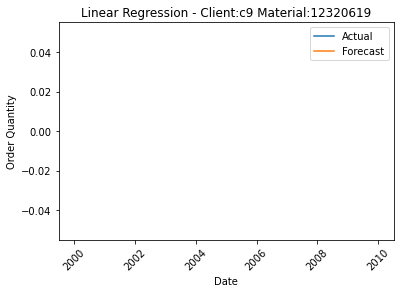

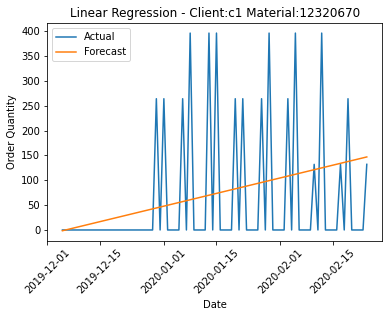

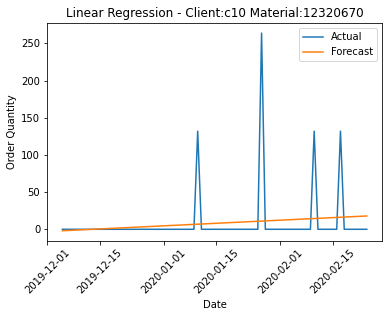

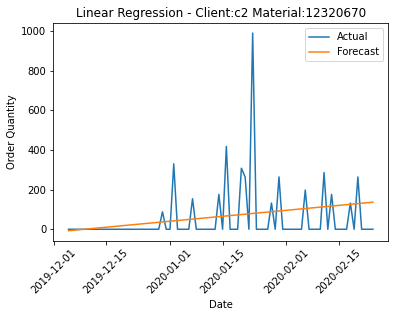

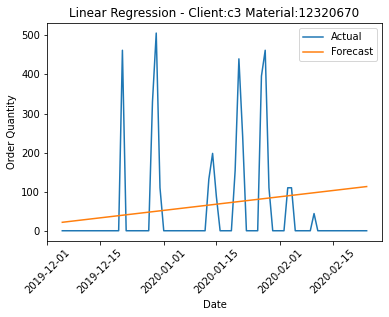

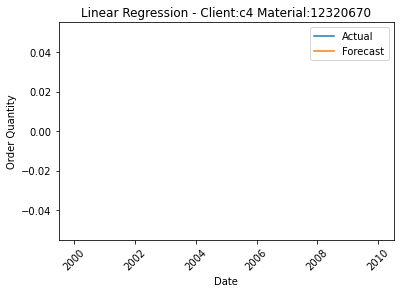

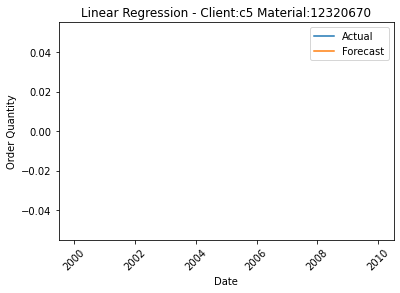

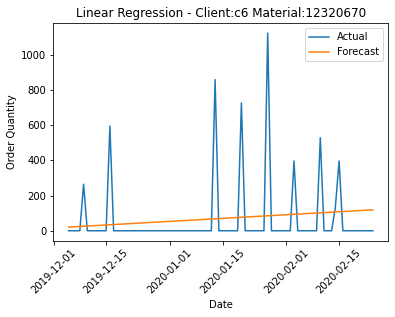

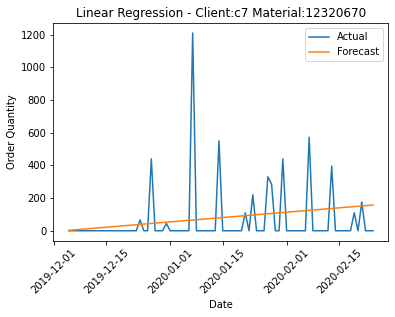

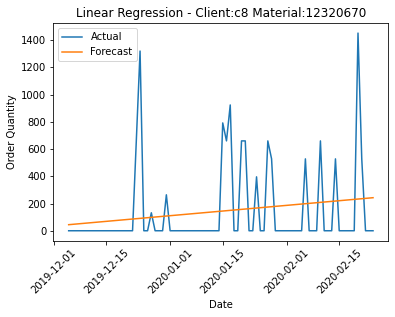

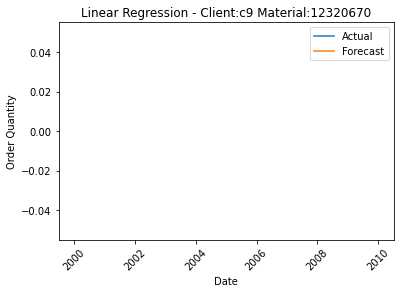

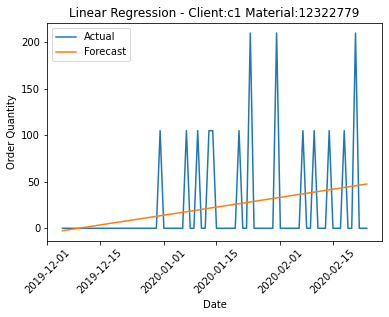

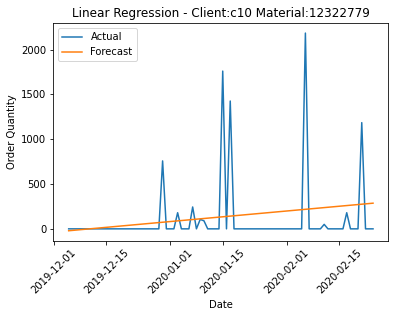

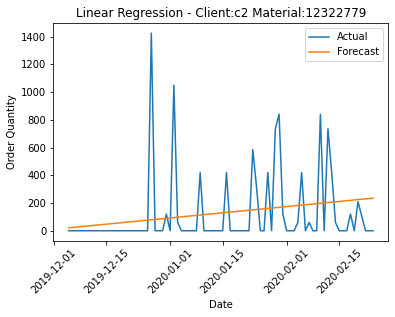

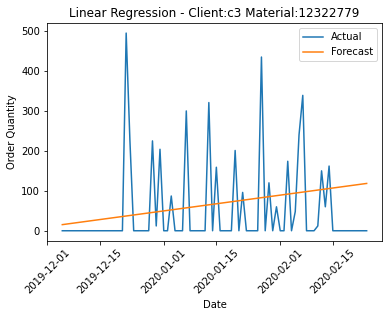

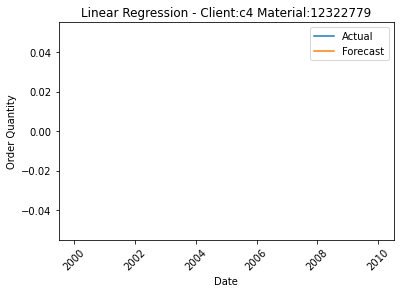

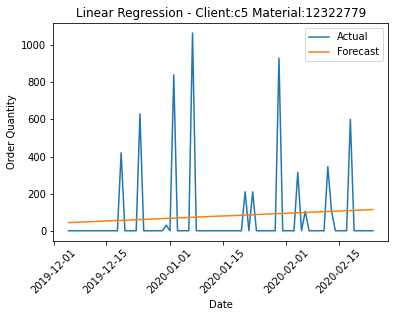

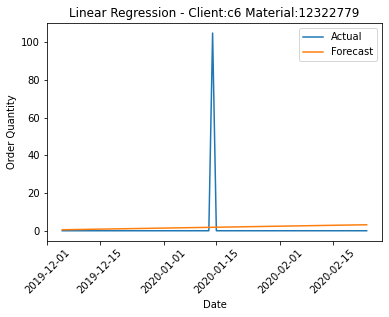

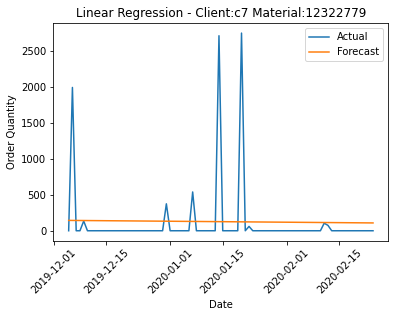

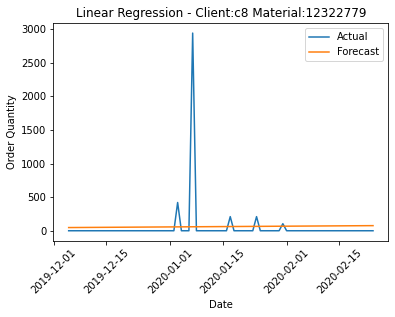

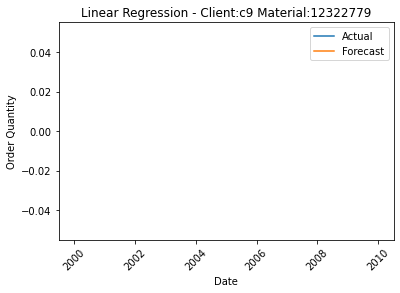

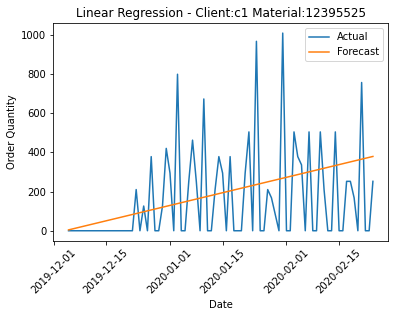

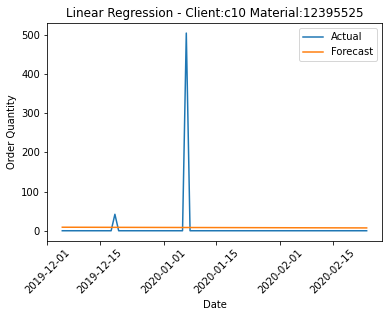

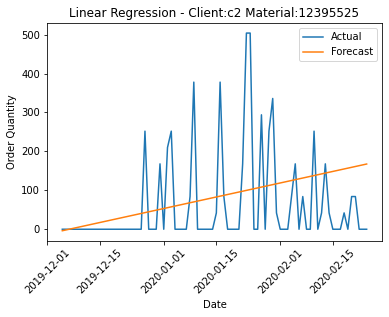

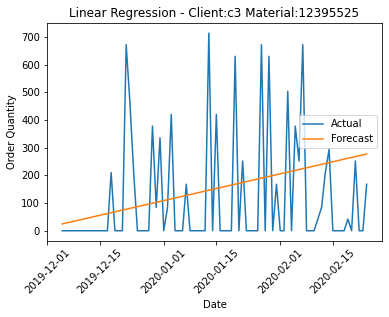

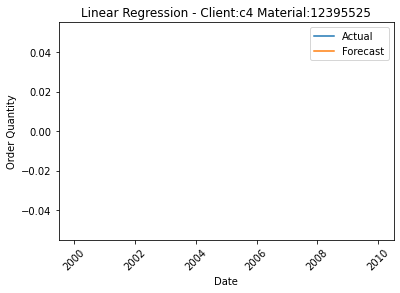

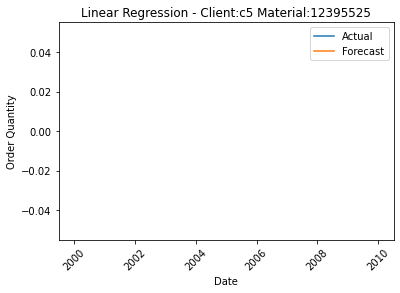

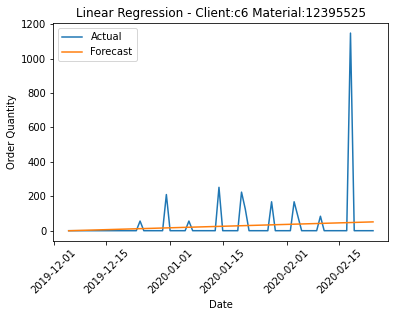

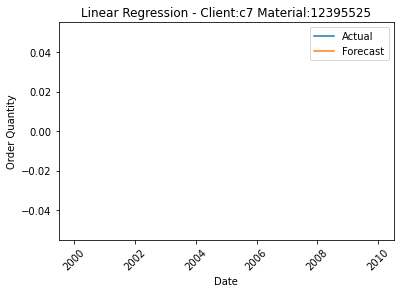

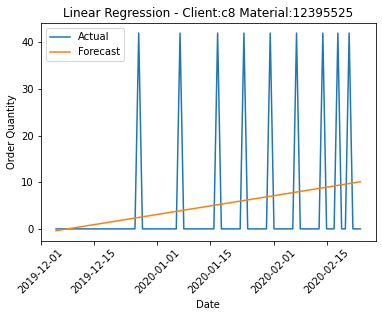

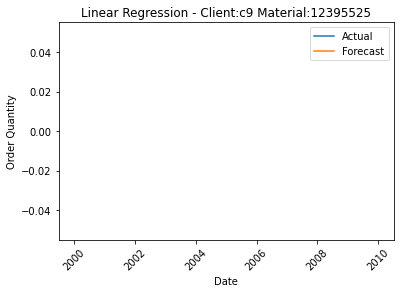

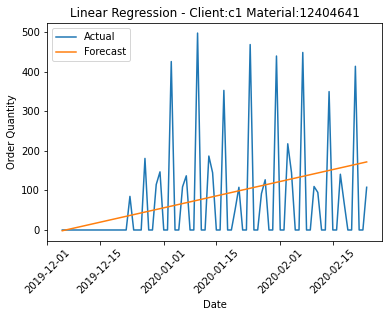

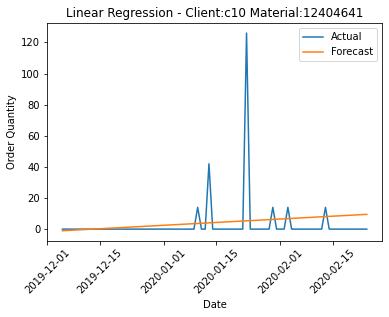

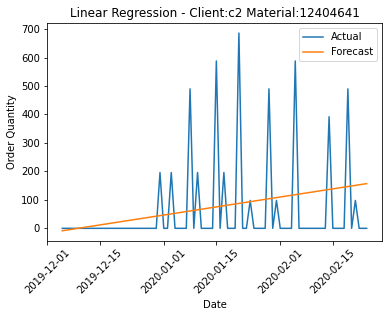

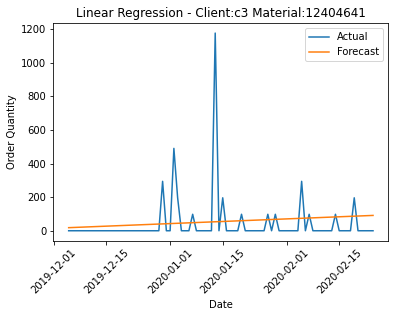

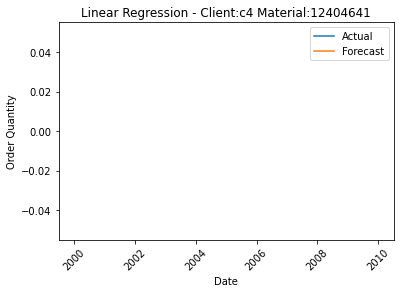

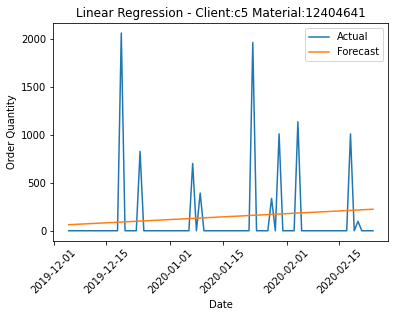

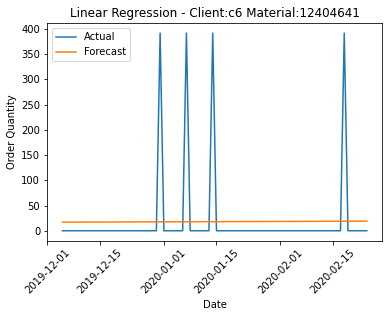

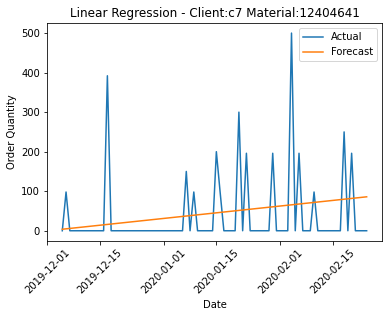

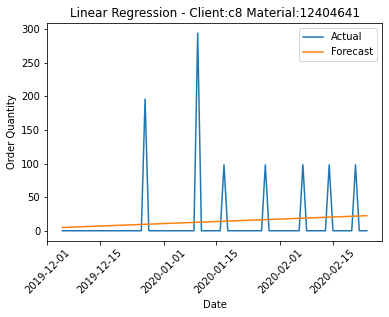

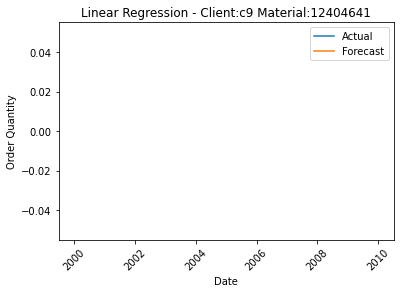

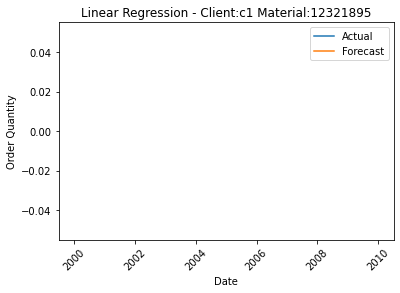

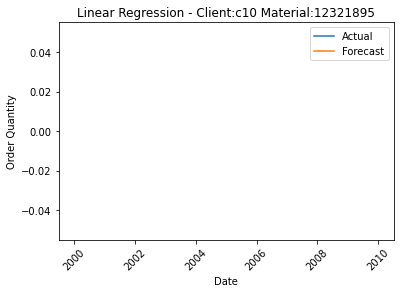

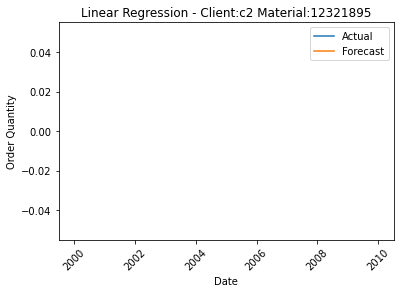

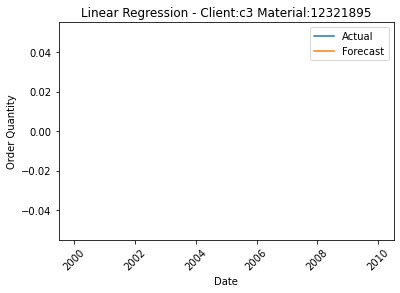

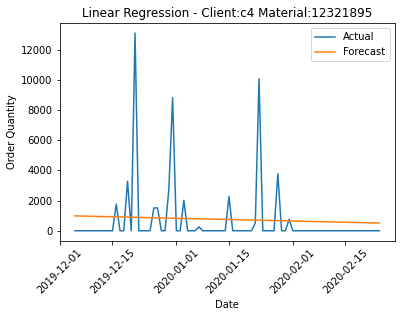

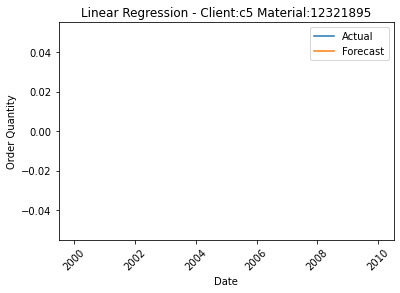

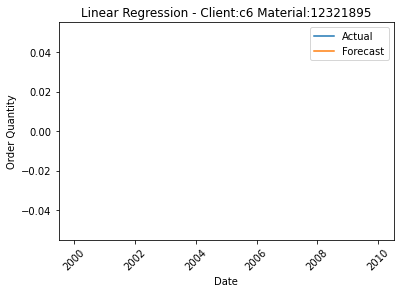

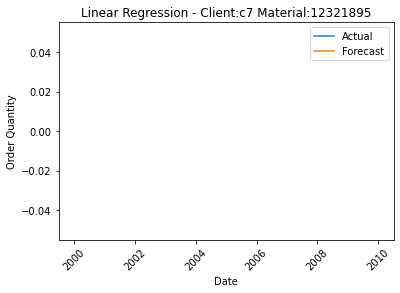

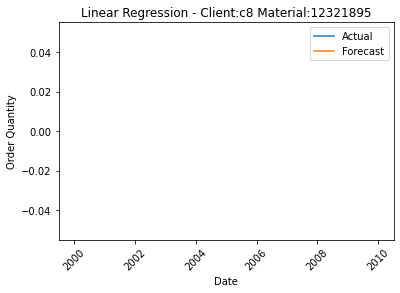

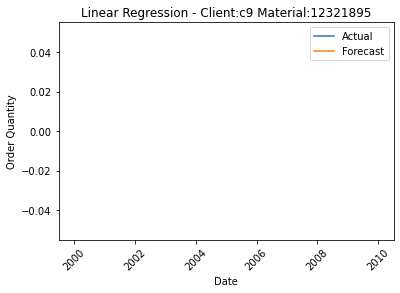

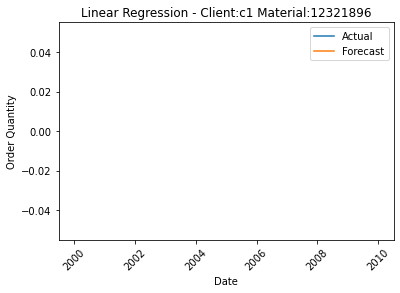

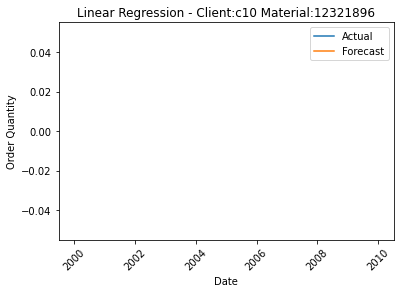

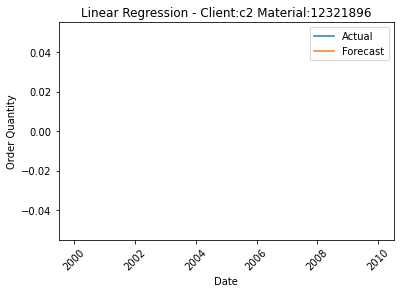

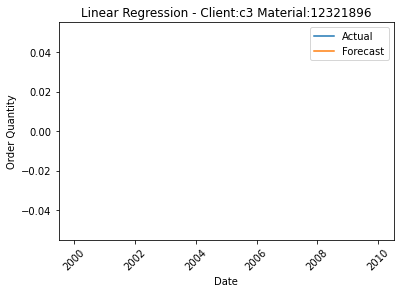

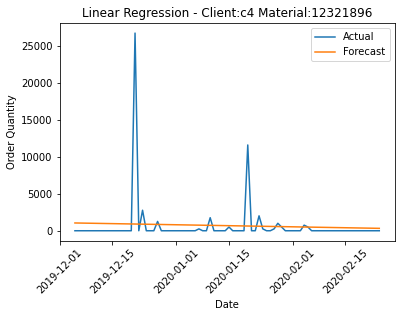

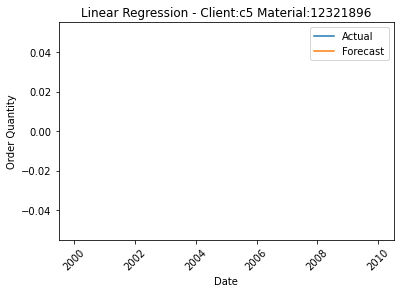

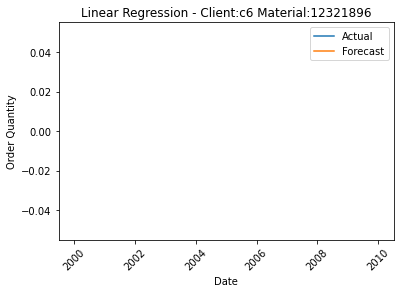

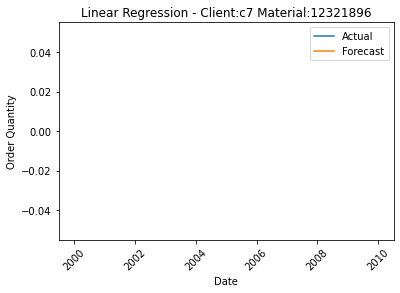

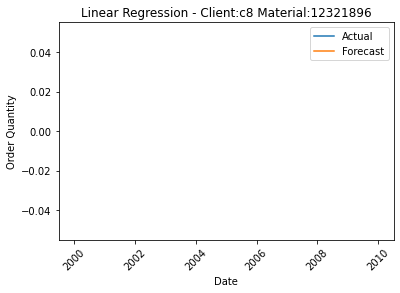

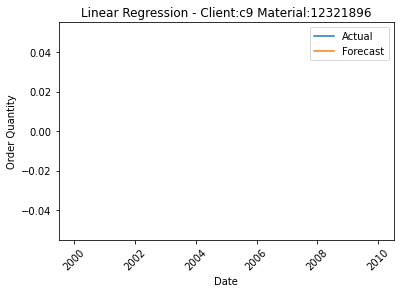

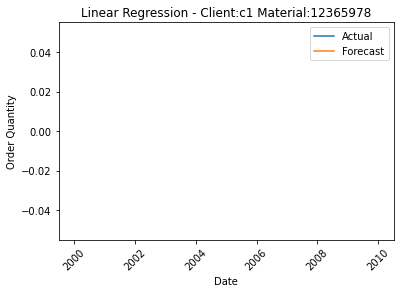

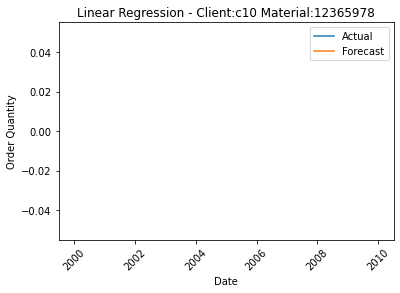

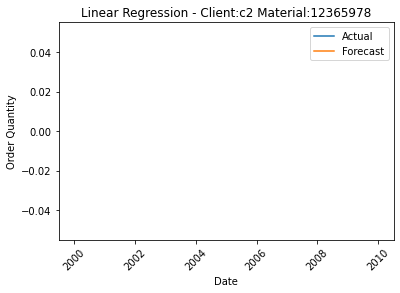

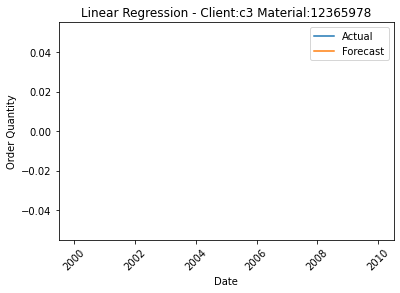

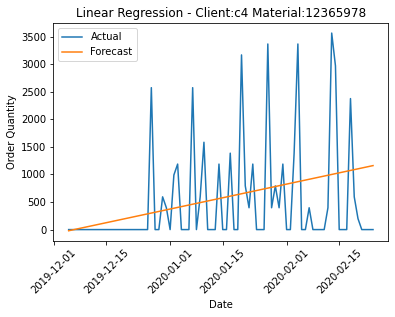

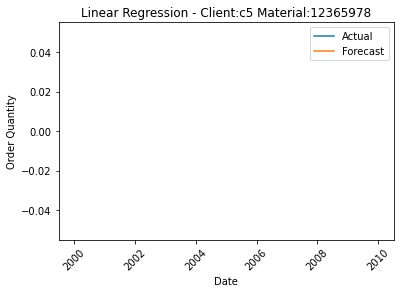

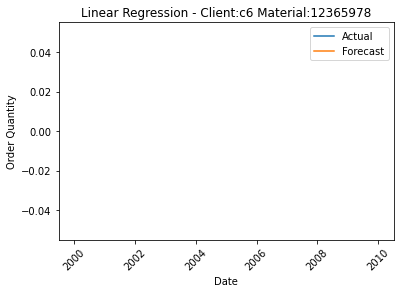

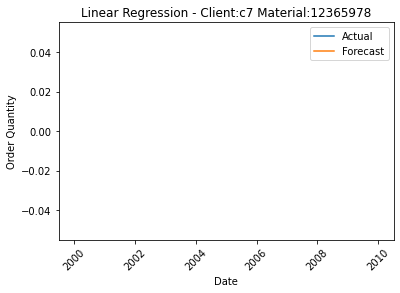

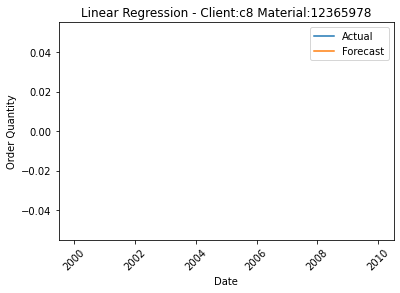

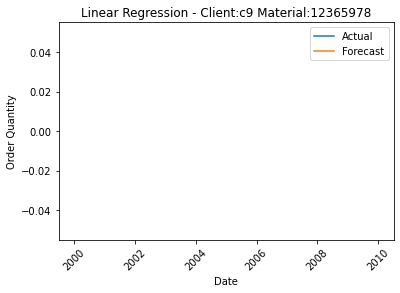

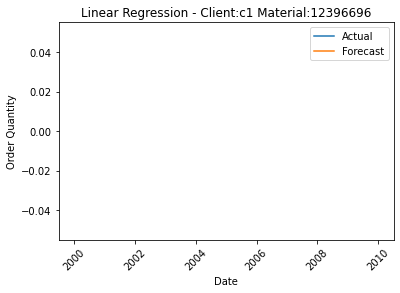

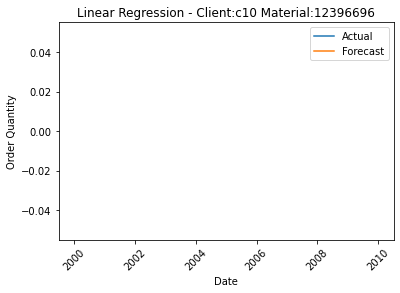

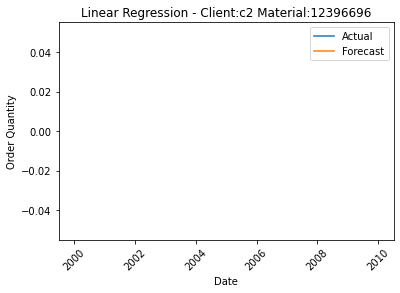

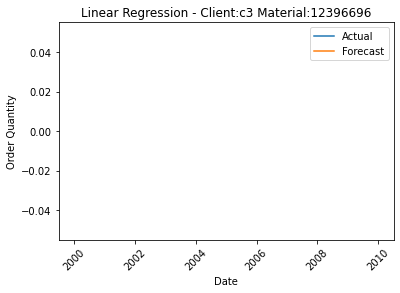

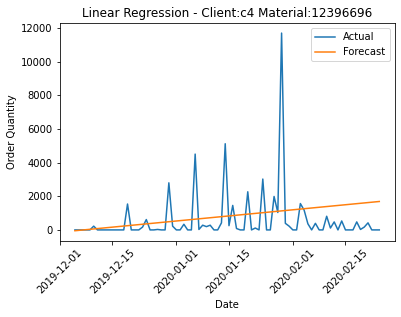

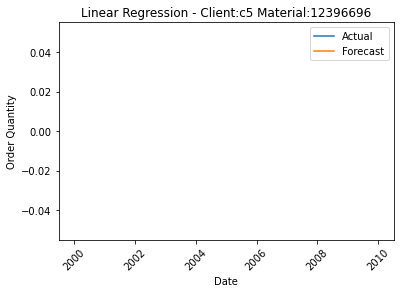

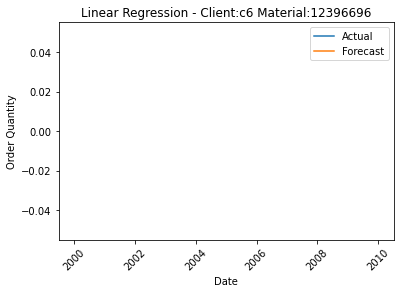

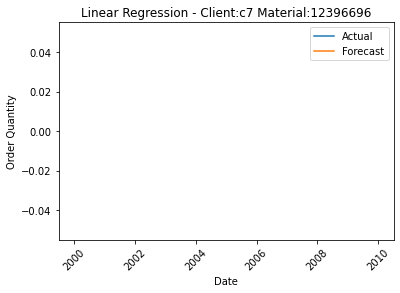

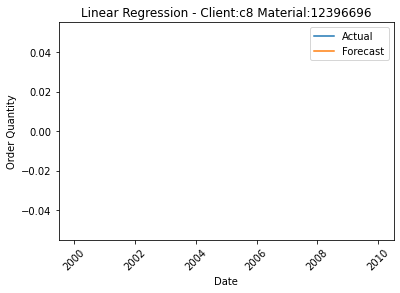

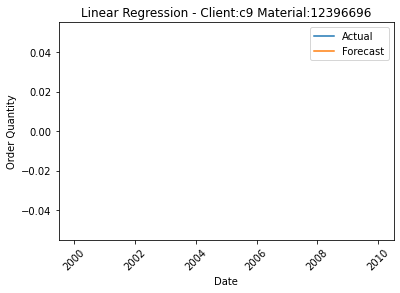

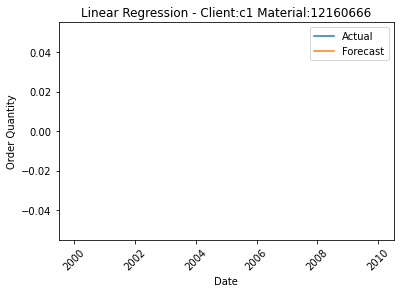

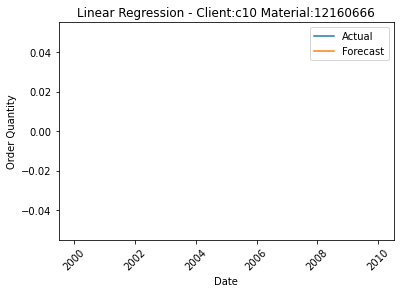

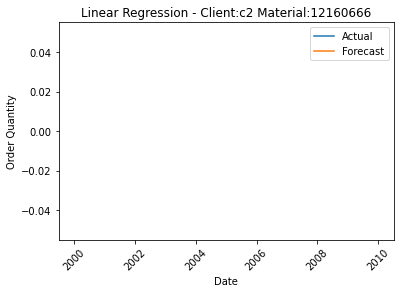

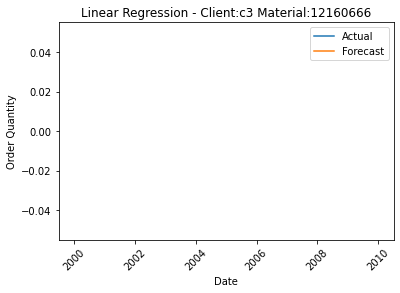

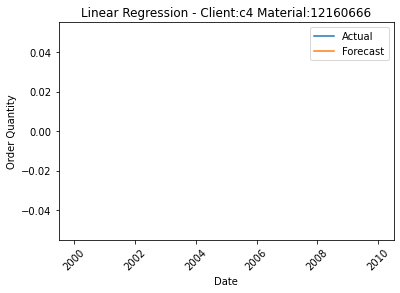

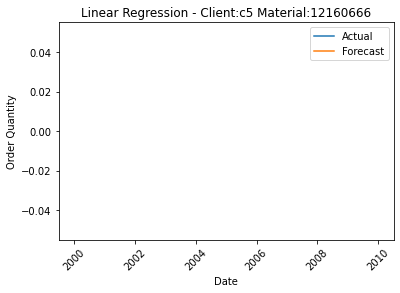

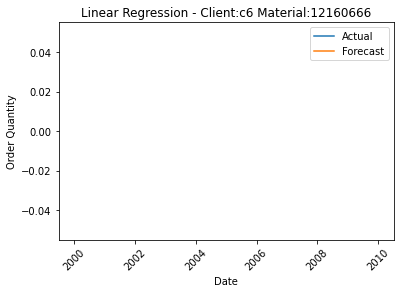

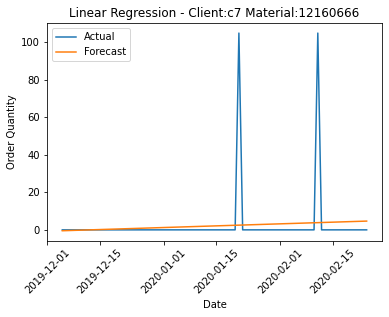

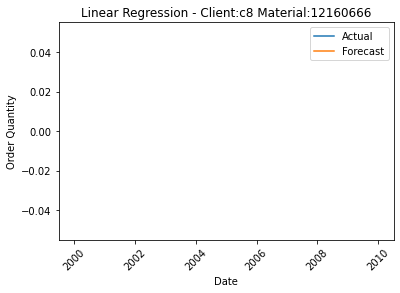

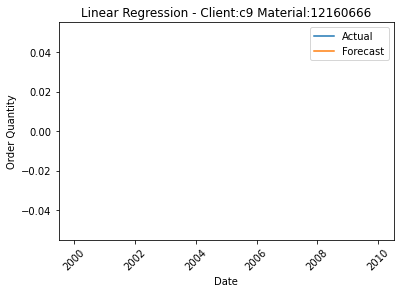

In [ ]:
#With all information
for material in material_list:
  for client in client_list: 
    plt.figure()
    plt.title('Linear Regression - Client:' +str(client) + ' Material:' +str(material))
    
    temp1 = All_Combinations_DF2[All_Combinations_DF2['Material']==material]
    temp2 = temp1[temp1['Client']==client]

    linreg_actual = plt.plot(temp2['Date'], temp2['Order Quantity'], label = 'Actual')
    linreg_forecast = plt.plot(temp2['Date'], temp2['predict_linreg'], label = 'Forecast')

    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Order Quantity')
    plt.legend()

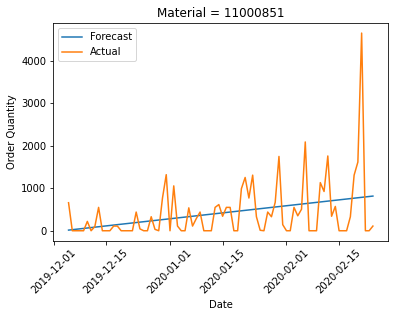

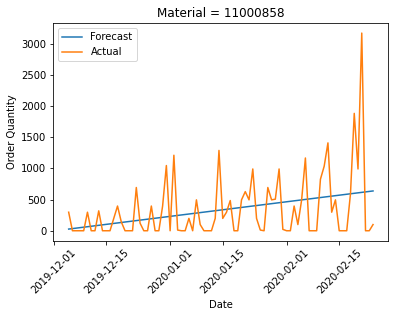

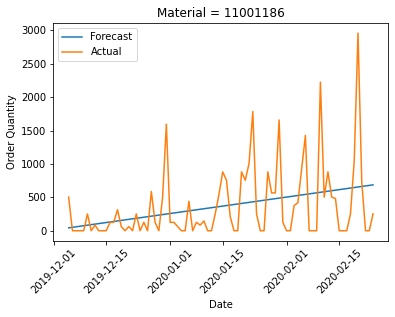

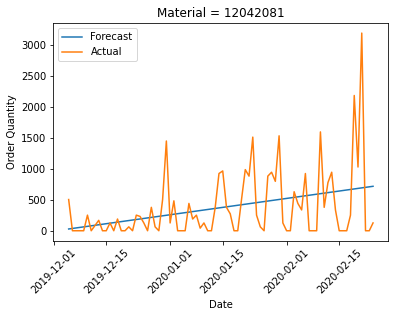

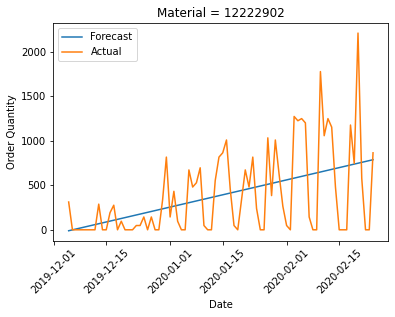

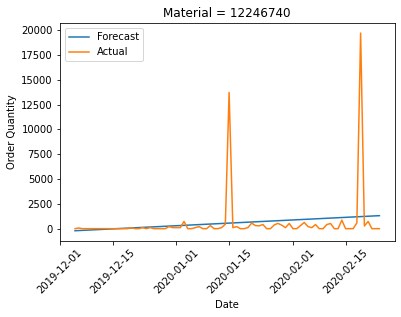

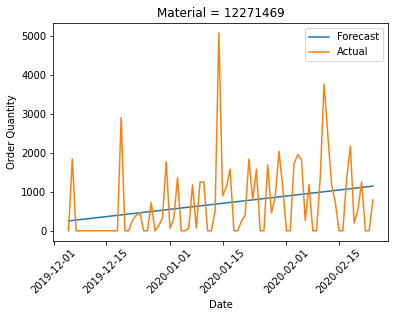

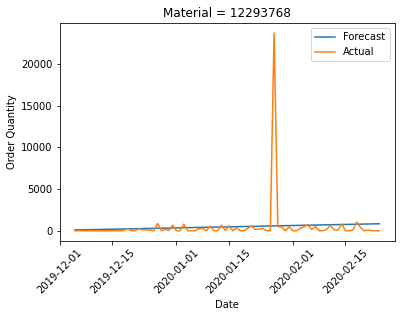

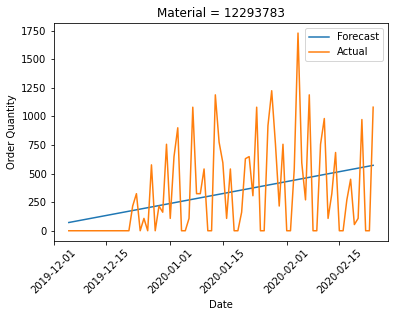

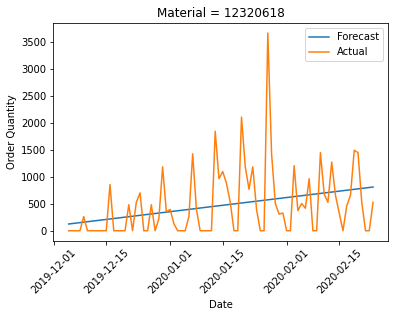

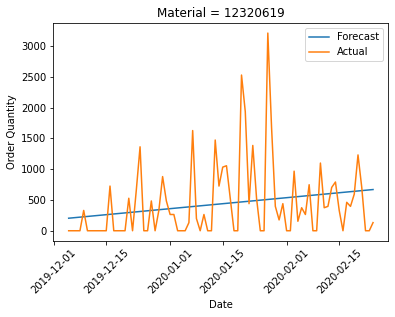

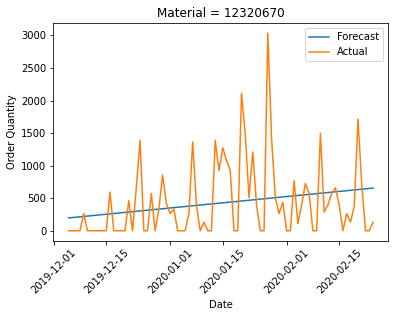

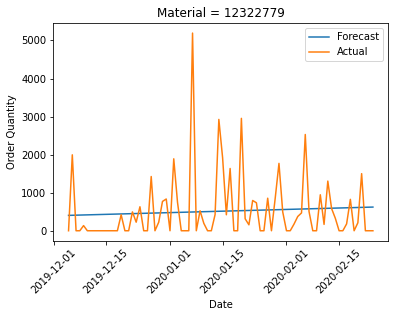

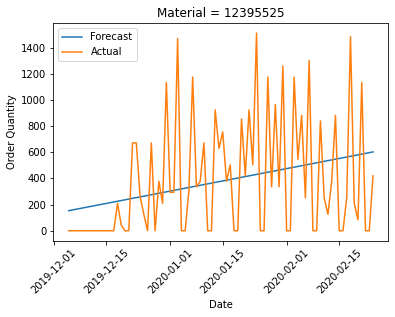

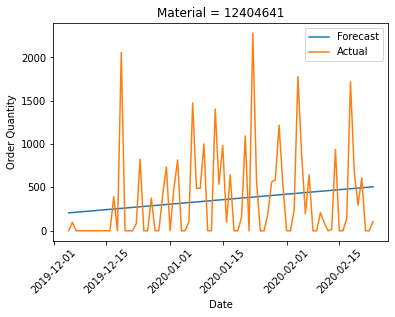

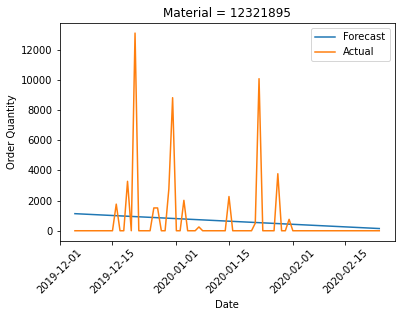

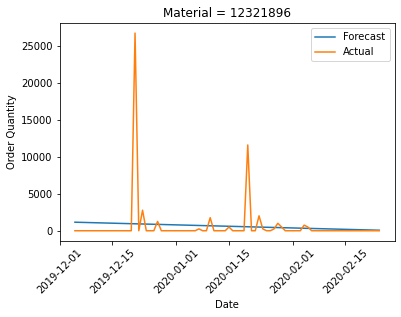

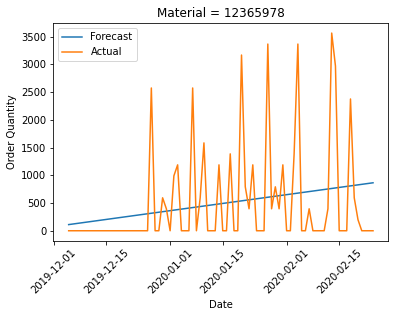

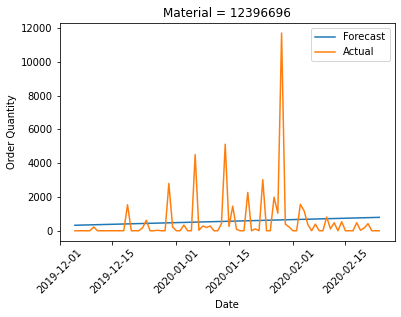

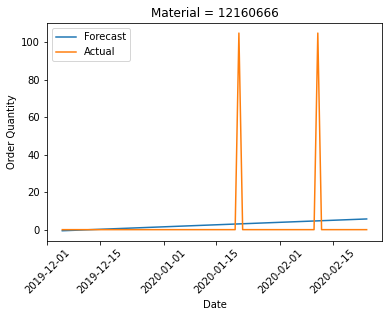

In [ ]:
#No client input
#20 plots are created for each unique material

for material in material_list: 
  temp1 = All_Combinations_DF2[All_Combinations_DF2['Material']==material]
  temp2 = temp1.groupby(by=['Day']).sum().reset_index()
  reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))
  predict1=[]
  for i in range(0,82):
    pred=reg.predict(np.array(All_Combinations_DF2.iloc[i]['Day']).reshape(1,-1))
    predict1.append(pred.tolist()[0])
  plt.figure()
  plt.plot(All_Combinations_DF2['Date'].unique(),predict1,label='Forecast')
  plt.plot(All_Combinations_DF2['Date'].unique(),temp2['Order Quantity'],label='Actual')
  plt.xlabel('Date')
  plt.xticks(rotation=45)
  plt.ylabel('Order Quantity')
  plt.legend()
  plt.title('Material = '+ str(material))

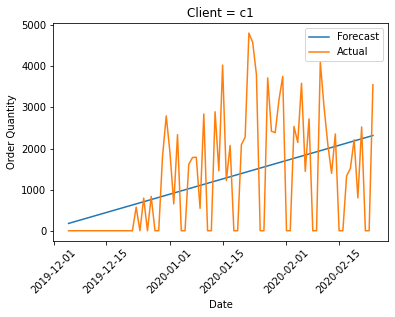

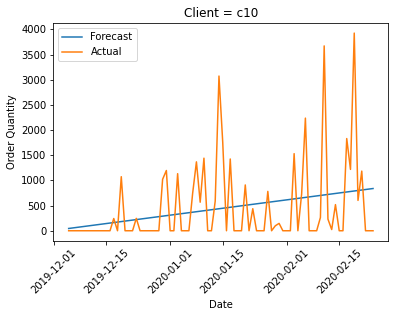

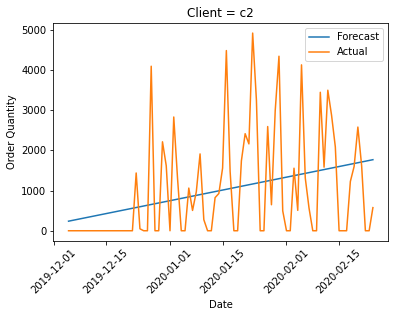

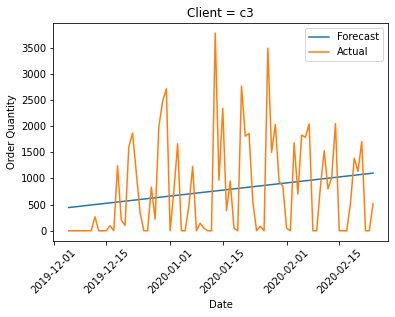

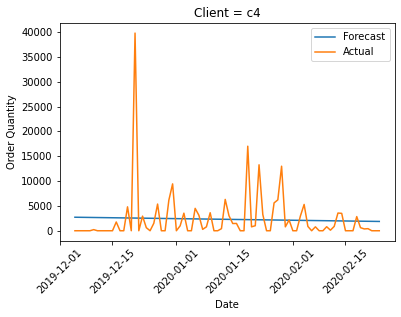

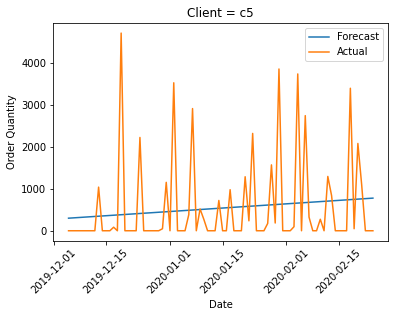

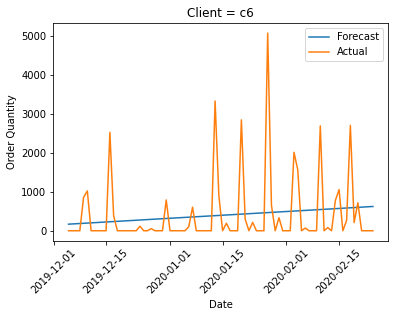

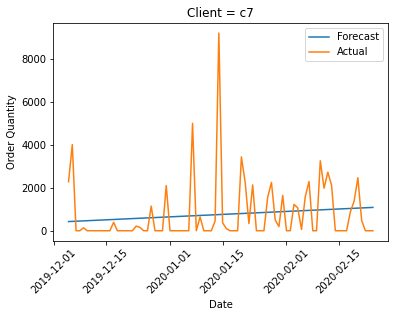

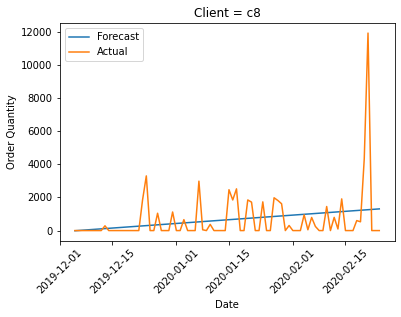

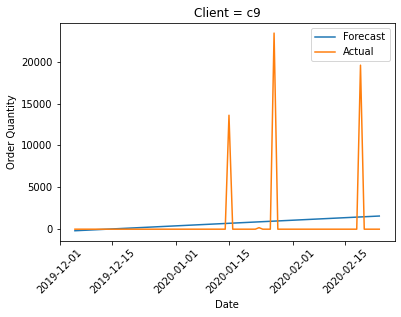

In [ ]:
#Without material information
#10 plots are created for each unique client

for client in client_list: 
  temp1 = All_Combinations_DF2[All_Combinations_DF2['Client']==client]
  temp2 = temp1.groupby(by=['Day']).sum().reset_index()
  reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))

  predict2=[]
  for i in range(0,82):
    pred=reg.predict(np.array(All_Combinations_DF2.iloc[i]['Day']).reshape(1,-1))
    predict2.append(pred.tolist()[0])
  plt.figure()
  plt.plot(All_Combinations_DF2['Date'].unique(),predict2,label='Forecast')
  plt.plot(All_Combinations_DF2['Date'].unique(),temp2['Order Quantity'],label='Actual')
  plt.xlabel('Date')
  plt.xticks(rotation=45)
  plt.ylabel('Order Quantity')
  plt.legend()
  plt.title('Client = '+ str(client))

## Mean Squared Error

The mean squared error, MSE, is computed to measure the quality of the two models. 

The mean squared error of an estimator is calcuated by taking the average squared difference between the estimated values and the actual values. It is often used to evaluate the quality and performance of predictors, in this case, the performance of the moving average forecasting model and the linear regression forecasting model. 

MSE is almost always positive because there is randomness in the data and the estimator sometimes cannot take some relevant information into account to produce more accurate results. Because MSE is the average squared difference between actual and estimation, thus, the smaller the MSE, the better/ more accurate the estimator.

### Moving Average

Here we calculate the mean squared error of the moving average model for all three situations: 
- input containing client and material name
- input containing only material name
- input containing only client name

As shown below, the MSE is the smallest when both client and material names are given, because the client-material-specific ordering behaviour is captured; unlike the other two situations in which other clients' ordering history or other material order quantities are taken into account.

Yet the MSE value is still quite large. This is because among all the possible client-material-date combinations, many of the order quantities were filled in as zero because clients did not make such purchase on that day; yet the calculated moving average may not be zero when there were purchases in the previous 3 days. This is inherent in the nature of the moving average model.

In [ ]:
# given client and material -> use the MA_Client_Material_DF
cm_mse = mean_squared_error(MA_Client_Material_DF_Visual['Order Quantity'][3:], MA_Client_Material_DF_Visual['Moving Average'][3:])

# given material -> use the MA_Material_DF
m_mse = mean_squared_error(MA_Material_DF_Visual['Order Quantity'][3:], MA_Material_DF_Visual['Moving Average'][3:])
    
# given client -> use the MA_Client_DF
c_mse = mean_squared_error(MA_Client_DF_Visual['Order Quantity'][3:], MA_Client_DF_Visual['Moving Average'][3:])

print('The Mean Squared Error of the Moving Average Method when: \n')
print('Both Client and Material are given: MSE = {}'.format(cm_mse))
print('Only Material is given: MSE = {}'.format(m_mse))
print('Only Client is given: MSE = {}'.format(c_mse))

The Mean Squared Error of the Moving Average Method when: 

Both Client and Material are given: MSE = 4578.504703409779
Only Material is given: MSE = 63751099.49027778
Only Client is given: MSE = 63751099.49027778


### Linear Regression

In [ ]:
test = test.assign(Day=lambda df: df['Date'].map(lambda date: (date - np.datetime64('2019-12-05')).days))

In [ ]:
#The linear regression model is trained base on the train set data, which can be used to forecast the demand in the test set

prediction=[]

for i in range(0,1888): 
    test_pred = lin_reg_predict (test.iloc[i]['Client'], test.iloc[i]['Material'],np.array(test.iloc[i]['Day']).reshape(1,-1), train)
    prediction.extend(test_pred.tolist()[0])

test['Prediction'] = prediction
test['Error'] = test['Prediction']-test['Order Quantity']
print('The MSE for test dataset is', mean_squared_error(test['Order Quantity'],test['Prediction']))
test

The MSE for test dataset is 291876.01027506543


Client  Material       Date  Order Quantity  Day   Prediction        Error
66       c1  11000851 2020-02-09             0.0   66   148.717949   148.717949
67       c1  11000851 2020-02-10           110.0   67   151.266743    41.266743
68       c1  11000851 2020-02-11           110.0   68   153.815538    43.815538
69       c1  11000851 2020-02-12           110.0   69   156.364332    46.364332
70       c1  11000851 2020-02-13           110.0   70   158.913127    48.913127
...     ...       ...        ...             ...  ...          ...          ...
9671     c9  12293768 2020-02-20             0.0   77  1247.030748  1247.030748
9672     c9  12293768 2020-02-21             0.0   78  1267.078426  1267.078426
9673     c9  12293768 2020-02-22             0.0   79  1287.126104  1287.126104
9674     c9  12293768 2020-02-23             0.0   80  1307.173781  1307.173781
9675     c9  12293768 2020-02-24             0.0   81  1327.221459  1327.221459

[1888 rows x 7 columns]

In [ ]:
#With all information given
print('The MSE for whole dataset is',mean_squared_error(All_Combinations_DF2['Order Quantity'],All_Combinations_DF2['predict_linreg']))

#Without client information
mse_no_client=0
for material in material_list: 
  temp1 = All_Combinations_DF2[All_Combinations_DF2['Material']==material]
  temp2 = temp1.groupby(by=['Day']).sum().reset_index()
  reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))
  predict1=[]
  for i in range(0,82):
    pred=reg.predict(np.array(All_Combinations_DF2.iloc[i]['Day']).reshape(1,-1))
    predict1.append(pred.tolist()[0])
  mse_no_client=mse_no_client + mean_squared_error(temp2['Order Quantity'],predict1)
  #print(mean_squared_error(temp2['Order Quantity'],predict1))

print('The MSE for no client information scenario is', mse_no_client)

#Without material information
mse_no_material=0
for client in client_list: 
  temp1 = All_Combinations_DF2[All_Combinations_DF2['Client']==client]
  temp2 = temp1.groupby(by=['Day']).sum().reset_index()
  reg = LinearRegression().fit(temp2['Day'].values.reshape(-1,1), temp2['Order Quantity'].values.reshape(-1,1))

  predict2=[]
  for i in range(0,82):
    pred=reg.predict(np.array(All_Combinations_DF2.iloc[i]['Day']).reshape(1,-1))
    predict2.append(pred.tolist()[0])
  mse_no_material=mse_no_material + mean_squared_error(temp2['Order Quantity'],predict2)
  #print(mean_squared_error(temp2['Order Quantity'],predict2))

print('The MSE for no material information scenario is', mse_no_client)

The MSE for whole dataset is 297370.9117648788
The MSE for no client information scenario is 35514105.55973142
The MSE for no material information scenario is 35514105.55973142


As shown above, the MSE value for test set and the whole dataset are similar (291,876 vs.297,370). This would demonstrates that the test set accouts for most of the error. The MSE for the two scenarios that without either client or material information, has extremely high MSE value (35,514,105). Since the predcition is based on the aggregation of demand, the error between actual order quantity and forecast can be very signicant. Without any of the inputs, the difficulty of forecasting the demand increase incredibly.

Furthermore, these high MSE values indicates that linear regression model is not optimal for the given dataset. The order quantity did not follow a linear trend and there are too much flucutation.

# D. Explanation of Major Functions in the Code

**user_input**

The user_input function is used to prompt users to input client number, material number and a future date. It takes a dataframe that contains all historical data as input (history_df). There are a few built-in checks in the function. 

1) date cannot be left empty. 

2) client number and material number cannot be both empty (but it is okay if one of them is empty)

3) client number and material number must already exist in history_df

4) the date provided must be later than the first entry in history_df

If any of the checks are not met by the user, the function would print the reason why they are incorrect, and prompt the user to enter the correct information again.

The function also converts the date entered by the client to the number of days it has passed from the first date in history_df

The function then returns “client number”, “material number” and “day” as output.


## Moving Average

**MA_predict**

The Ma_predict function is created to extract the forecasted material order quantity on a future date, based on the client number and/or material number input. The function takes in client number, material, future date as input. Based on these input, it extracts the forecasted value from the previously constructed rolling-window dataframes correspondingly. 

There are three different scenarios:

1) both client number and material numbers are given: forecast is extracted from the dataframe (MA_Client_Material_DF) that contains the moving average prediction for the specified material and the given client 

2) if client number is not given: forecast is extracted from the dataframe (MA_Client_DF) that contains the moving average prediction for the specified client

3) if material number is not given: forecast is extracted from the dataframe(MA_Material_DF) that contains the moving average prediction for the specified material

The function outputs the predicted demand.

## Linear Regression

**lin_reg_predict**

The lin_reg_predict function is used to predict the order quantity of a given date, with specified client number and/or material number. The function takes client number, material, a dataframe that contains all historical data as input (history_df) and date that the user wishes to predict order quantity for (converted to the number of days it has passed since the first date in history_df in the function User_input).

There are three different scenarios:

1) both client number and material numbers are given: Model predicts the demand for the specified material from the given client on the given future date

2) if client number is not given: Model predicts aggregate demand for the given material from all clients on the given future date

3) if material number is not given: Model predicts aggregate demand for all the materials from the given client on the given future date

The function finally returns the predicted demand as an output.


**user_func**

The user_func function combines the user_input function, the MA_predict function and the lin_reg_predict function together. User would enter the date, client and/or material information into the corresponding boxes after calling the function. The predicted forecasts of the two different methods would be returned.

In [ ]:
def user_func():
    choice = input("For Moving Average Prediction, Enter 1\nFor Linear Regression Prediction, Enter 2\n")
    
    # moving average prediction based on user input
    if choice == '1':
        print('Please enter information for moving average forecast: \n')
        try:
          client_number_MA, material_number_MA, future_day_MA = user_input(All_Combinations_DF)
          MA_pred = MA_predict(client_number_MA, material_number_MA, future_day_MA)
          print('\nThe Moving Average forecast quantity is {}'.format(MA_pred))
        
        except IndexError:
          print('\nThe client {} has never purchased material {}, so no forecast is available'.format(
              client_number_MA, material_number_MA))
          MA_pred = 0


    # linear regression prediction based on user input
    elif choice == '2':
        print('\nPlease enter information for linear regression forecast: \n')
        try:
          client_number_LR, material_number_LR, future_day_LR = user_input(All_Combinations_DF)
          LR_pred = lin_reg_predict (client_number_LR, material_number_LR, np.array(future_day_LR).reshape(1,-1), train)[0][0]
        except ValueError:
          print('\nThe client {} has never purchased material {}, so no forecast is available'.format(
              client_number_LR, material_number_LR))
          LR_pred = 0
      
        print('\nThe Linear Regression forecast quantity is {}'.format(LR_pred))
    
    else:
        print('Invalid input. Please start over.')

    

# E. How to Use

The function user_func is for the user to interact with the program we have developed. Both the moving average method and the linear regression method are wrapped in the same function, and the user can select which one s/he would like to use. Note that the user_func makes predictions based on the entire dataset.

To start, users can type in user_func() in the coding block and run the block. The program prompts the user to enter what prediction method is preferred, client number, material number and date that they wish to make a prediction of. If any of the information is not incorrect, then the program will print the reason why they are incorrect, and prompt the user to re-enter the information. If all information are correct, the program will print the prediction result.

Below are a few demonstrations:

1) The user did not enter “1” (moving average) or “2” (linear regression) as instructed, the program shows “Invalid input. Please start over.”

2) The user entered a date that was earlier than the earliest entry in historical data, the program prompt the user to re-enter correct information.

3) The user entered a user-material combination that has no previous record in the historical data, the program cannot give a reasonable prediction in this case.

4) The user entered only the client number and date, the program allowed the field of material to be empty and proceeded to make aggregate predictions.

5) The user tried to leave all fields empty, the program printed error messages and prompted the user to re-enter the information.


In [ ]:
# (1)
user_func()

For Moving Average Prediction, Enter 1
For Linear Regression Prediction, Enter 2

Invalid input. Please start over.


In [ ]:
# (2)
user_func()

For Moving Average Prediction, Enter 1
For Linear Regression Prediction, Enter 2
1
Please enter information for moving average forecast: 

Enter Client Number or press enter to skip: c1
Enter Material Number or press enter to skip: 11000851
Enter date in the form of year-month-day (example: 2022-01-05): 2019-10-30
Date provided is earlier than the earlist record
Please try again!
Enter Client Number or press enter to skip: c1
Enter Material Number or press enter to skip: 11000851
Enter date in the form of year-month-day (example: 2022-01-05): 2021-03-26

The Moving Average forecast quantity is 36.666666666666664


In [ ]:
# (3)
user_func()

For Moving Average Prediction, Enter 1
For Linear Regression Prediction, Enter 2
2

Please enter information for linear regression forecast: 

Enter Client Number or press enter to skip: c4
Enter Material Number or press enter to skip: 11000851
Enter date in the form of year-month-day (example: 2022-01-05): 2020-05-21

The client c4 has never purchased material 11000851, so no forecast is available

The Linear Regression forecast quantity is 0


In [ ]:
# (4)
user_func()

For Moving Average Prediction, Enter 1
For Linear Regression Prediction, Enter 2
2

Please enter information for linear regression forecast: 

Enter Client Number or press enter to skip: c1
Enter Material Number or press enter to skip: 
Enter date in the form of year-month-day (example: 2022-01-05): 2021-02-05

The Linear Regression forecast quantity is 18084.860146818348


In [ ]:
# (5)
user_func()

For Moving Average Prediction, Enter 1
For Linear Regression Prediction, Enter 2
2

Please enter information for linear regression forecast: 

Enter Client Number or press enter to skip: 
Enter Material Number or press enter to skip: 
Enter date in the form of year-month-day (example: 2022-01-05): 
Date cannot be empty
Client Number and Material Number cannot both be empty.
Please try again!
Enter Client Number or press enter to skip: c3
Enter Material Number or press enter to skip: 11000851
Enter date in the form of year-month-day (example: 2022-01-05): 2020-09-18

The Linear Regression forecast quantity is 133.93892078071175


The user can enter new information here:

In [ ]:
user_func()